<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 11 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Produisez une étude de marché avec Python
</h2>
    <h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">2ème partie : Analyse des données</h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Étape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [6]:
#Importation de la librairie Pandas
import pandas as pd

#Importation de la librairie NumPy
import numpy as np

#Importation de pyplot de la librairie matplotlib
import matplotlib.pyplot as plt

#Importation de la librairie seaborn
import seaborn as sns

import plotly.express as px

from sklearn import preprocessing,decomposition,cluster, metrics

from sklearn.cluster import AgglomerativeClustering, KMeans

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement du fichier de données</h3>
</div>

In [8]:
#Importation du fichier Data_2017_Etude_de_marche.csv
Data_2017 = pd.read_csv('Data_2017.csv')
Data_2017.set_index('Pays', inplace=True)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.3 - Description des données </h3>
</div>

**Récapitulatif des caractéristiques  :**
- Il y a minimum 8 variables dans mon modèle
- Il y a 153 pays compris dans l'analyse (>60% de la population mondiale)
- Toutes les données sont complètes (pas ou plus de valeur manquante)
- Outliers identifiés dans ce NoteBook : Inde et Chine pour leur population, Brésil et Etats-Unis pour leurs exportations

**Variables :**
*Sauf mention particulière, toutes les données concernent l'année 2017*

- **Disponibilité alimentaire:** Exprimée en Kcal/personne/jour, elle correspond à la disponibilité d'aliments en
quantité suffisante et d'une qualité appropriée pour l’alimentation humaine. Il s'agit ici de la disponibilité alimentaire concernant la viande de volaille seulement, afin de cibler au mieux les pays consommateurs de cet aliment.
- **Disponibilité intérieure:** Exprimée en kg, elle correspond à la disponibilité totale de la viande de volaille au
sein du pays.
- **Exportations (kg):** Quantité de viande de volaille exportée 
- **Importations (kg):** Quantité de viande de volaille importée
- **Nourriture (kg):** Quantité de viande de volaille utiliséee pour l'alimentation humaine
- **Production (kg):**  Quantité de viande de volaille produite à l'intérieur du pays
- **Population :** Nombre d'habitants
- **Stabilité politique:** Index de stabilité politique et d'absence de violence/terrorisme mesurent la perception de la probabilité d'instabilité politique et/ou de violence à motivation politique, y compris le terrorisme. L'estimation donne le score du pays sur l'indicateur agrégé, en unités d'une distribution normale standard, c'est-à-dire allant d'environ -2,5 à 2,5.
- **PIB par habitant :** Produit intérieur brut en $ PPA (Parité de Pouvoir d'achat) internationaux constants de 2017
- **Croissance PIB:** Pourcentage de l'évolution du PIB/habitant par rapport à l'année précédente
  

In [10]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(Data_2017.shape[0]))
print("Le tableau comporte {} colonne(s)".format(Data_2017.shape[1]))

Le tableau comporte 153 observation(s) ou article(s)
Le tableau comporte 10 colonne(s)


In [12]:
#Afficher le fichier Data_2017 
Data_2017

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Nourriture (kg),Production (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB
Pays,,,,,,,,,,
Afghanistan,5,5.700000e+07,0,29000000.0,5.500000e+07,28.0,36296113.0,-2.79,2956.8,1.492959
Afrique du Sud,143,2.118000e+09,63000000,514000000.0,2.035000e+09,1667.0,57009756.0,-0.28,14823.6,17.248839
Albanie,85,4.700000e+07,0,38000000.0,4.700000e+07,13.0,2884169.0,0.37,14229.3,9.831055
Algérie,22,2.770000e+08,0,2000000.0,2.640000e+08,275.0,41389189.0,-0.92,13805.4,4.228057
Allemagne,71,1.739000e+09,646000000,842000000.0,1.609000e+09,1514.0,82658409.0,0.57,61563.6,6.063881
...,...,...,...,...,...,...,...,...,...,...
Ukraine,78,1.009000e+09,273000000,121000000.0,1.006000e+09,1211.0,44487709.0,-1.87,16523.5,20.542019
Uruguay,33,3.300000e+07,3000000,3000000.0,3.100000e+07,33.0,3436641.0,1.04,29662.1,12.813067
Viet Nam,48,1.206000e+09,1000000,291000000.0,1.166000e+09,918.0,94600648.0,0.21,10405.4,8.380229


Vérifions la nature des données dans chacune des colonnes et s'il n'y a plus de valeurs manquantes:

In [14]:
#La nature des données dans chacune des colonnes
Data_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, Afghanistan to Zimbabwe
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Disponibilité alimentaire (Kcal/personne/jour)  153 non-null    int64  
 1   Disponibilité intérieure (kg)                   153 non-null    float64
 2   Exportations - Quantité (kg)                    153 non-null    int64  
 3   Importations - Quantité (kg)                    153 non-null    float64
 4   Nourriture (kg)                                 153 non-null    float64
 5   Production (kg)                                 153 non-null    float64
 6   Population                                      153 non-null    float64
 7   Stabilite Politique                             153 non-null    float64
 8   PIB par habitant                                153 non-null    float64
 9   Croissance PIB                   

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse en Composantes Principales </h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Préparons les données </h3>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1.1 - Recherche de corrélations</h4>
</div>

**Regardons d'abord la matrice des corrélations des variables entre elles**

In [16]:
#Appelons X l'ensemble des variables et leurs valeurs
X = pd.DataFrame(Data_2017)

<Axes: title={'center': 'Matrice des corrélations'}>

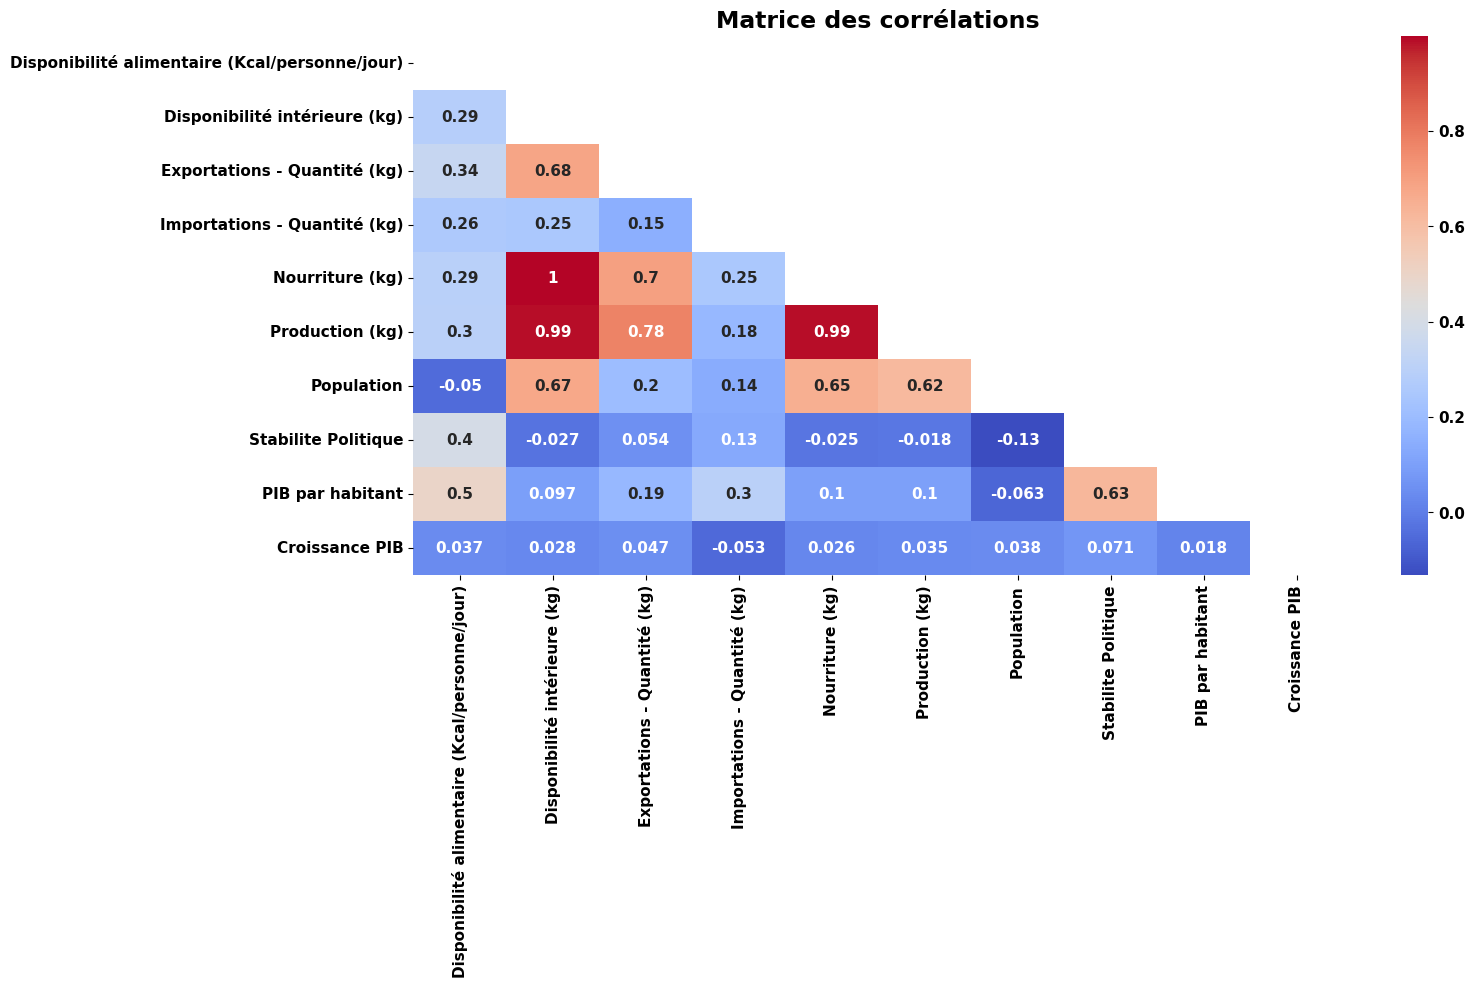

In [18]:
corr = X.corr()

fig, ax = plt.subplots(figsize=(15, 7))
plt.rcParams.update({'font.size': 11,'font.weight':'bold'})
plt.title ("Matrice des corrélations",fontsize = 17,fontweight ='bold')
plt.xticks (fontsize = 11,fontweight ='bold')
plt.yticks (fontsize = 11,fontweight ='bold')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='coolwarm', annot = True, mask = mask)

Nous pouvons constater que les 3 variables suivantes sont très fortement corrélées entre elles :
- Nourriture
- Production
- Disponibilité intérieure

 --> Supprimons-en 2 sur les 3 : **Nourriture** et **Production**


In [21]:
X.drop(columns = ["Nourriture (kg)","Production (kg)"], inplace = True)

<Axes: title={'center': 'Nouvelle matrice des corrélations'}>

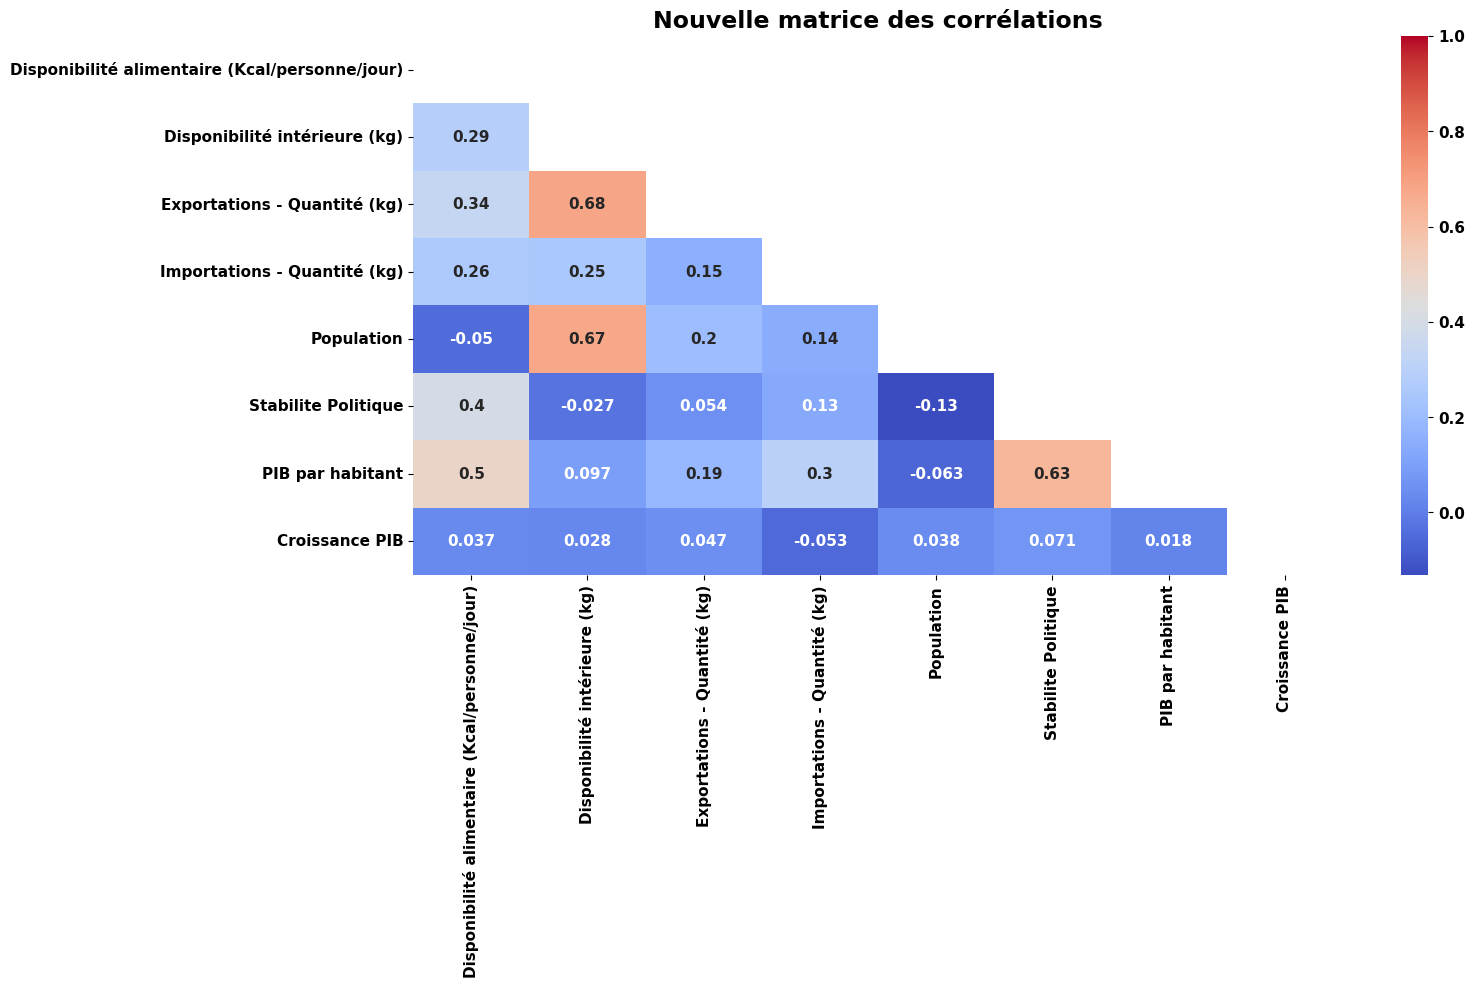

In [23]:
corr = X.corr()

fig, ax = plt.subplots(figsize=(15, 7))
plt.rcParams.update({'font.size': 11,'font.weight':'bold'})
plt.title ("Nouvelle matrice des corrélations",fontsize = 17,fontweight ='bold')
plt.xticks (fontsize = 11,fontweight ='bold')
plt.yticks (fontsize = 11,fontweight ='bold')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='coolwarm', annot = True, mask = mask, vmax = 1)

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1.2 - Centrage et réduction des données</h4>
</div>

In [25]:
# On standardise les données (centrées et réduites)
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

#Affichons les moyennes et écarts-type des données centrées et réduites
X_scaled = pd.DataFrame(X_scaled,columns = X.columns, index = X.index)
X_scaled.describe().round(2).iloc[1:3:, : ]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB
mean,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Après centrage et réduction des données:
- la moyenne des valeurs pour chaque variable = 0
- l'écart-type = 1

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - ACP Normée</h3>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2.1 - Calcul et étude des composantes</h4>
</div>

**Comme il y a 8 variables décrivant le jeu de données, l'ACP a au maximum 8 composantes,
calculons-les puis affichons-les sous forme de tableau:**

In [28]:
n_components=8
pca = decomposition.PCA(n_components)
pca.fit(X_scaled)

PCA(n_components=8)

In [30]:
pcs = pca.components_

pcs = pd.DataFrame(pcs)

x_list = range(1, n_components+1)
list(x_list)

pcs.columns = X.columns
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2).T

,F1,F2,F3,F4,F5,F6,F7,F8
Disponibilité alimentaire (Kcal/personne/jour),0.44,-0.25,0.02,-0.25,0.23,0.78,-0.08,-0.13
Disponibilité intérieure (kg),0.46,0.45,0.02,-0.07,-0.10,0.00,-0.08,0.75
Exportations - Quantité (kg),0.43,0.25,0.11,-0.51,0.26,-0.48,-0.03,-0.43
Importations - Quantité (kg),0.32,-0.03,-0.40,0.63,0.53,-0.15,-0.16,-0.05
Population,0.23,0.51,0.00,0.38,-0.52,0.23,0.06,-0.47
Stabilite Politique,0.30,-0.48,0.11,0.07,-0.46,-0.23,-0.63,-0.01
PIB par habitant,0.40,-0.42,-0.03,0.09,-0.22,-0.18,0.75,0.07
Croissance PIB,0.05,-0.01,0.90,0.34,0.25,-0.01,0.04,0.02


**Utilisons le pourcentage de variance expliquée par chacune des composantes et le pourcentage cumulé**

In [32]:
#Combien de composantes utiliser?
#Utilisons le pourcentage de variance expliquée par chacune des composantes
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
scree_cum

array([ 31.,  55.,  68.,  79.,  88.,  94.,  98., 100.])

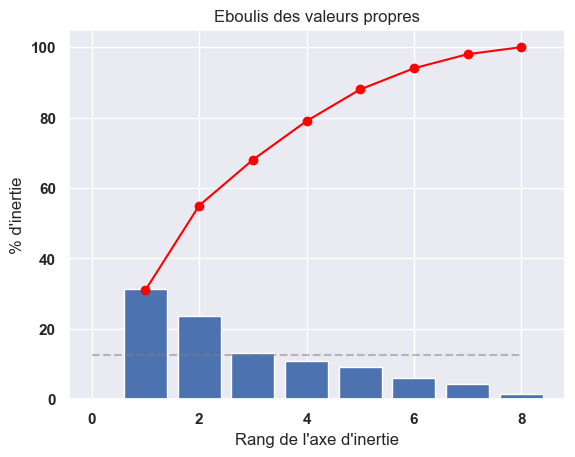

In [34]:
#Affichons-les
sns.set()

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("% d'inertie")
plt.title("Eboulis des valeurs propres")
plt.plot([0, n_components], [12.5, 12.5], color='grey', alpha=0.5,ls='--')
plt.show(block=False)

- Les 3 premières composantes expliquent environ 68% de la variance des données initiales.
- Les 4 premières composantes captent 79% de la variance des données initiales.
- Une composante expliquant moins de 12,5% de l'inertie totale (100/nb composantes) peut être écartée car elle n'engendre pas une perte d'information significative
- F4 représente moins de 12,5% d'inertie

**--> Retenons les 3 premières composantes principales**

In [37]:
n_components=3
pca = decomposition.PCA(n_components)
pca.fit(X_scaled)

PCA(n_components=3)

In [39]:
pcs = pca.components_

pcs = pd.DataFrame(pcs)

x_list = range(1, n_components+1)
list(x_list)

pcs.columns = X.columns
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2).T

,F1,F2,F3
Disponibilité alimentaire (Kcal/personne/jour),0.44,-0.25,0.02
Disponibilité intérieure (kg),0.46,0.45,0.02
Exportations - Quantité (kg),0.43,0.25,0.11
Importations - Quantité (kg),0.32,-0.03,-0.40
Population,0.23,0.51,0.00
Stabilite Politique,0.30,-0.48,0.11
PIB par habitant,0.40,-0.42,-0.03
Croissance PIB,0.05,-0.01,0.90


<Axes: title={'center': 'Calcul des composantes'}>

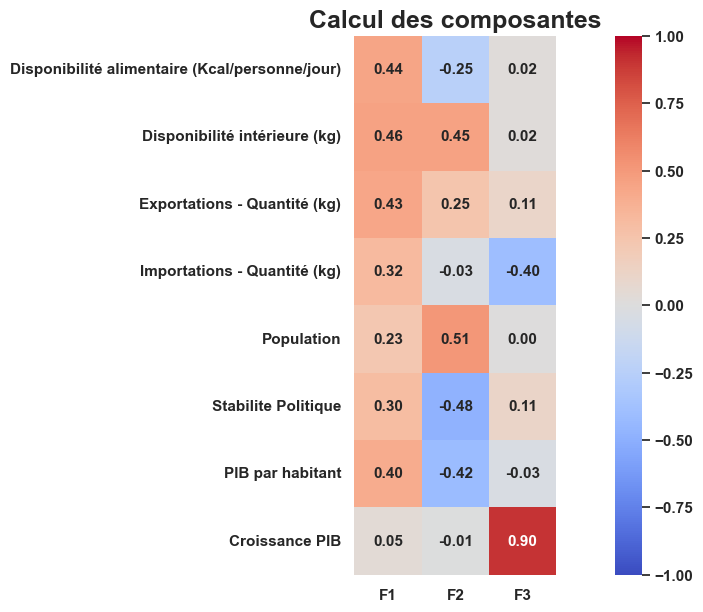

In [41]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.rcParams.update({'font.size': 11,'font.weight':'bold'})
plt.xticks (fontsize = 11,fontweight ='bold')
plt.yticks (fontsize = 11,fontweight ='bold')
plt.title("Calcul des composantes", fontsize = 18,fontweight ='bold')
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f",square = True)

On constate pour les 3 premières composantes:
- **F1** est principalement correlée positivement à la **disponibilité intérieure**(0,46), la **disponibilité alimentaire**(0,44), les **exportations**(0,43) et le **PIB par habitant**(0,40) :
Cet composante s'apparente à la **santé économique et ressources intérieures** d'un pays
      

- **F2** est principalement correlée positivement à la **population**(0,51), négativement à la **stabilité politique**(-0,48) puis positivement à la **disponibilité intérieure**(0,45) et négativement au **PIB par habitant**(-0,42): Elle reflète **l'état de développement** d'un pays. 

- **F3** est fortement corrélée positivement au **taux de croissance du PIB**(0,90), et dans une moindre mesure corrélée négativement aux **importations**(-0,40). Elle correspondrait au potentiel de croissance économique (pays en voie de développement)


<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2.2 - Cercles des corrélations et projection des individus</h4>
</div>

In [44]:
#Projection: Calcul des coordonnées des individus dans le nouvel espace
X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, columns = ["F1", "F2", "F3"])
X_proj[:5]

,F1,F2,F3
0,-2.225200,1.949980,-1.007205
1,1.388586,0.114499,0.580539
2,-0.257810,-0.504274,0.558487
3,-1.227942,0.693673,-0.333671
4,2.819152,-0.593422,-1.495526


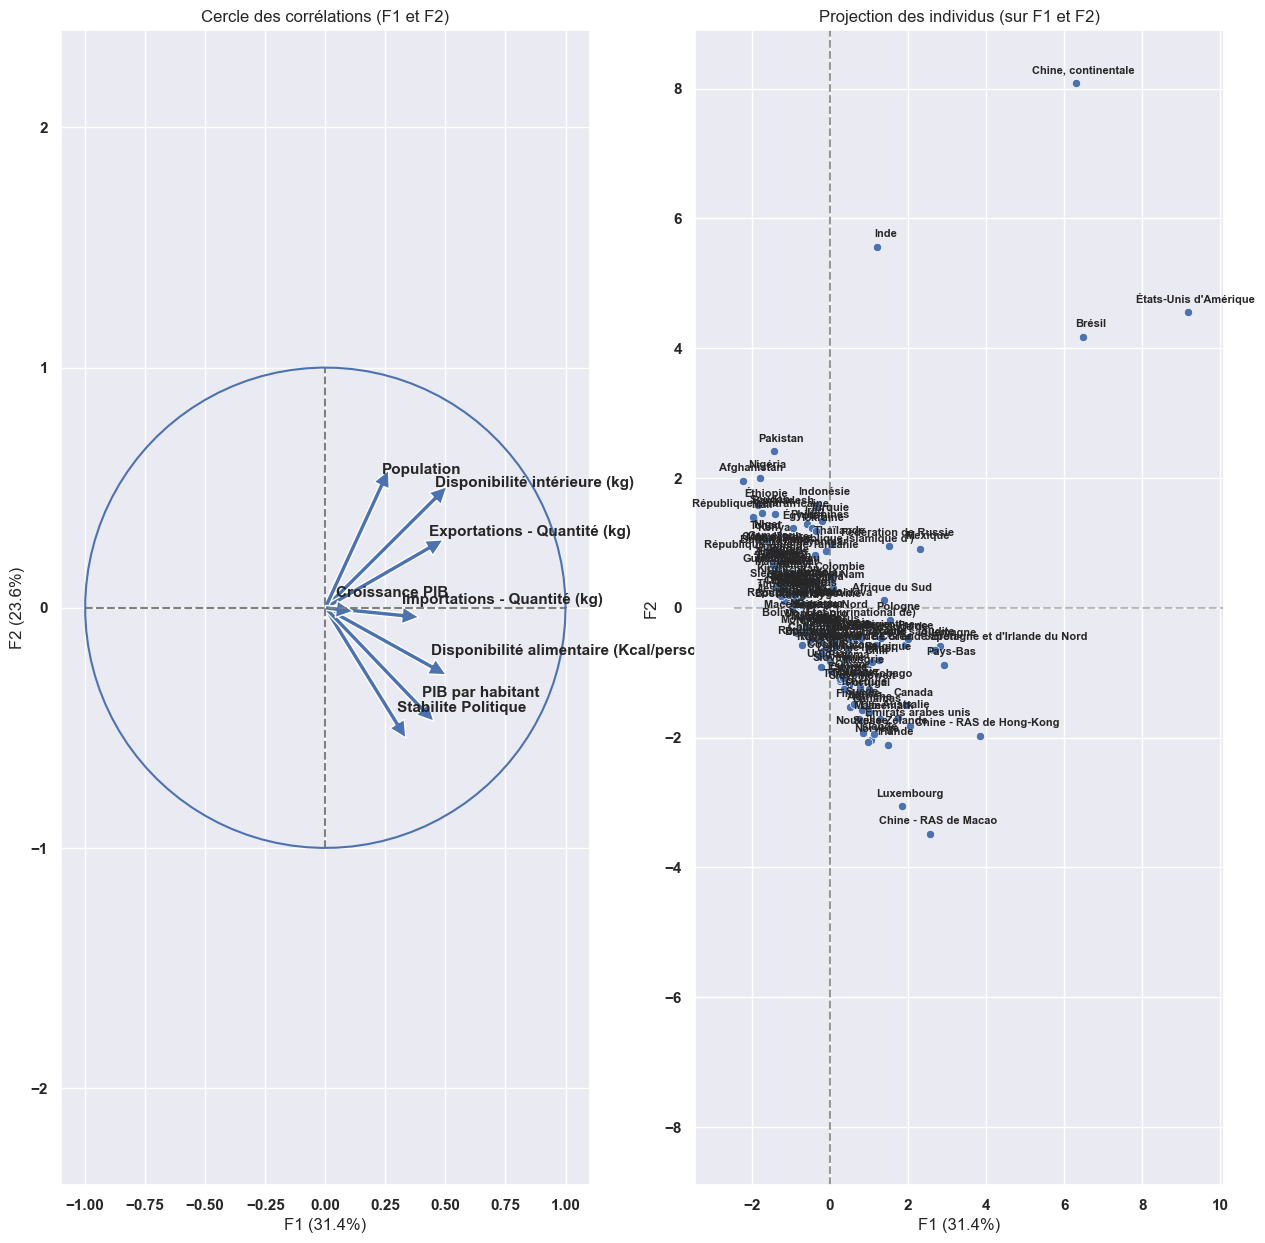

In [46]:
 ############################
# Graphique des corrélations #
############################
 
x, y = 0,1 #Composantes F1, F2

features = pcs.columns

fig, ax = plt.subplots(1,2,figsize=(15, 15))

plt.subplot(1,2,1)

for i in range(0, pca.components_.shape[1]):
    ax[0].arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[x, i],  #0 for PCx+1
             pca.components_[y, i],  #1 for PCy+1
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[x, i],
             pca.components_[y, i] + 0.05,
             features[i])

# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')

 ##################################
# Projection des pays sur F1 et F2 #
##################################
plt.subplot(1,2,2)

# (Re)Transforme X_projected en np.array
X_ = np.array(X_proj)

sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y])

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{}'.format(y+1))

# Valeur x max et y max
x_max = np.abs(X_[:, x]).max() *1.1
y_max = np.abs(X_[:, y]).max() *1.1
x_min = X_[:, x].min() *1.1

# On borne x et y 
ax[1].set_xlim(left=x_min-1, right=x_max)
ax[1].set_ylim(bottom= -y_max, top=y_max)

# Affichage des lignes horizontales et verticales
plt.plot([x_min, x_max], [0, 0], color='grey', alpha=0.5,ls='--')
plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8,ls='--')

# Affichage des labels des points
labels = X.index
if len(labels) : 
    for i,(_x,_y) in enumerate(X_[:,[x,y]]):
      plt.text(_x+0.2, _y+0.2, labels[i], fontsize='8', ha='center',va='center') 

plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")

plt.show()


**Rappel**
- F1 : **Santé économique et ressources intérieures** d'un pays
 
- F2 : **Etat de développement** d'un pays (population et instabilité économique et politique)

**Lecture des graphiques**
- La Chine a beaucoup de ressources (à droite) mais présente une certaine instabilité politique et économique, et une forte population (en haut)
- Les pays ayant une faible population et une stabilité pol & éco importante sont dans la moitié basse du graphique
- Les pays ayant peu de ressources intérieures et un faible PIB sont à gauche du graphique
  
 -->  **Nous recherchons plutôt des pays stables économiquement et politiquement : les pays les plus interessants selon nos critères seraient dans la partie en bas à droite du graphique**

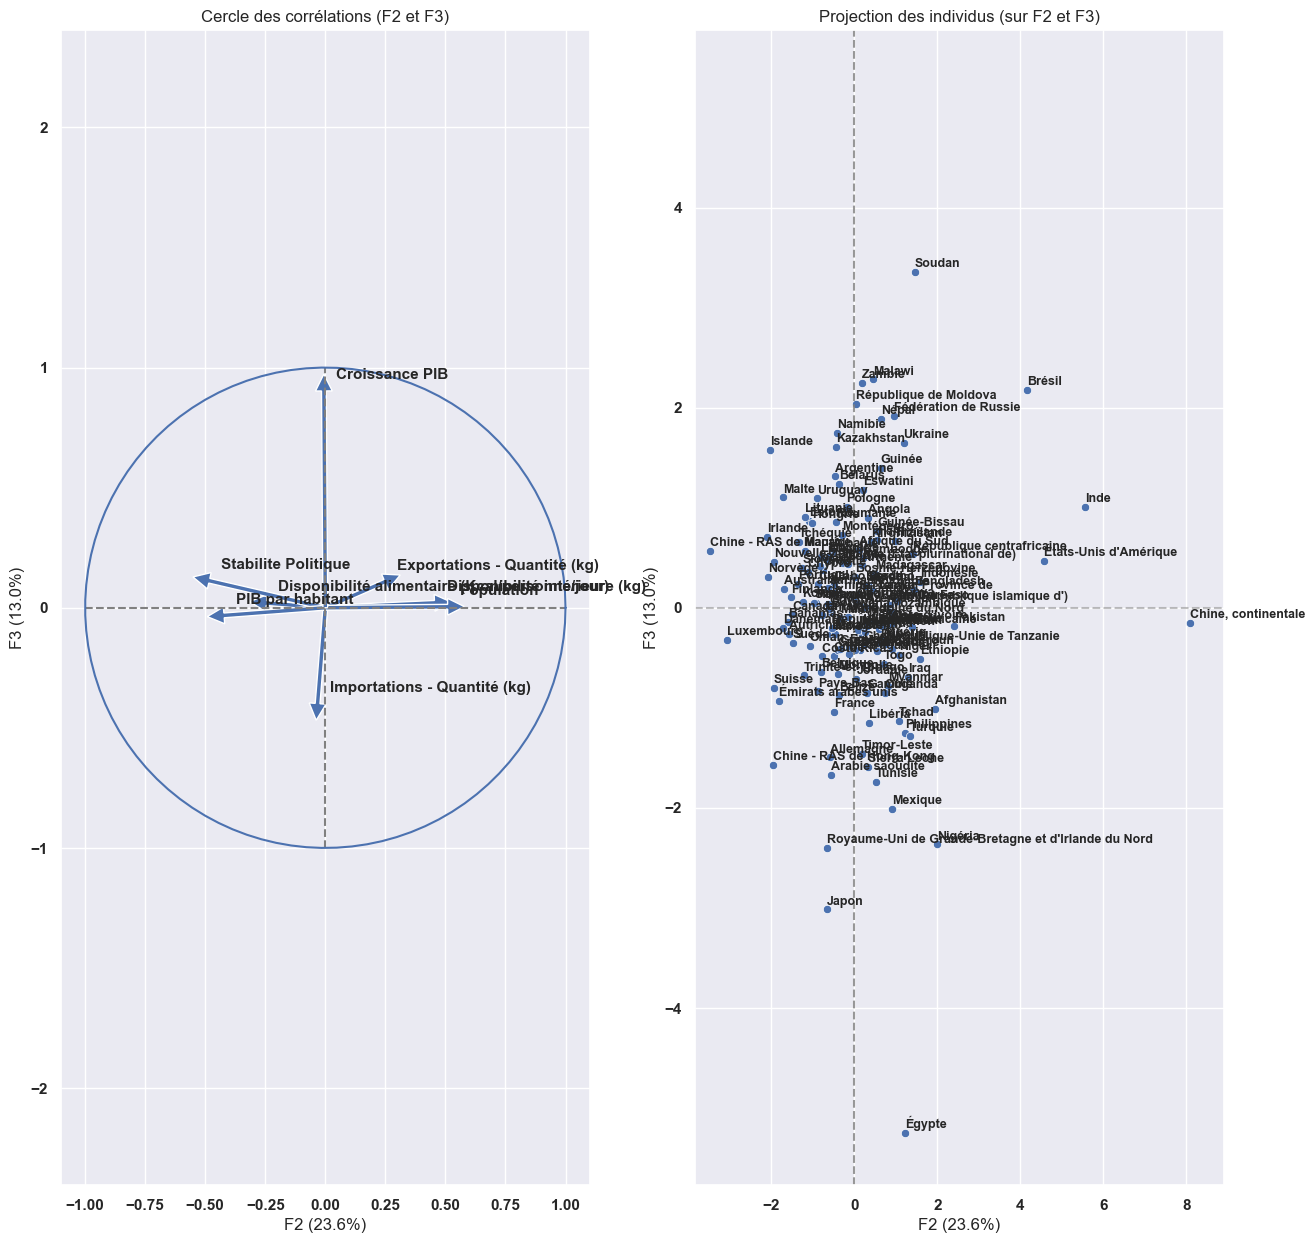

In [49]:
 ############################
# Graphique des corrélations #
############################
x, y = 1,2
features = pcs.columns

fig, ax = plt.subplots(1,2,figsize=(15, 15))

plt.subplot(1,2,1)

for i in range(0, pca.components_.shape[1]):
    ax[0].arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[x, i],  #1 for PCx+1
             pca.components_[y, i],  #2 for PCy+1
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[x, i] + 0.05,
             pca.components_[y, i] + 0.05,
             features[i])

# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')

 ##################################
# Projection des pays sur F2 et F3 #
##################################

plt.subplot(1,2,2)
# Transforme X_projected en np.array
X_ = np.array(X_proj)

sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y])

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

# Valeur x max et y max
x_max = np.abs(X_[:, x]).max() *1.1
y_max = np.abs(X_[:, y]).max() *1.1
x_min = X_[:, x].min() *1.1

# On borne x et y 
ax[1].set_xlim(left=x_min, right=x_max)
ax[1].set_ylim(bottom= -y_max, top=y_max)

# Affichage des lignes horizontales et verticales
plt.plot([x_min, x_max], [0, 0], color='grey', alpha=0.5,ls='--')
plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8,ls='--')

# Affichage des labels des points
if len(labels) : 
    for i,(_x,_y) in enumerate(X_[:,[x,y]]):
       plt.text(_x, _y+0.05, labels[i], fontsize='9') 

plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")

plt.show()


**Rappel**
- F2 : **Etat de développement** d'un pays (population et instabilité économique et politique)
- F3 : potentiel de croissance économique (pays en développement) et importations

**Lecture des graphiques**
- Les pays ayant une faible population et une stabilité pol & éco importante sont dans la partie gauche du graphique
- Les pays fortement importateurs sans forte croissance économique sont dans la partie basse du graphique
  
 -->  **Les pays les plus interessants selon nos critères seraient dans la partie gauche du graphique, certains en bas (fortes importations et croissance économique faible mais positive) et d'autres en haut (pays à croissance elevée et importateur)**

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Classification des individus sur données réduites </h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Classification ascendante hierarchique  sur données réduites - CAH</h3>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1.1 - Dendrogramme</h4>
</div>

**Données réduites ==> Nous utiliserons X_scaled**

Calcul des distances avec la méthode de Ward :

In [57]:
Z = linkage(X_scaled, method="ward")
pd.DataFrame(Z)

,0,1,2,3
0,115.0,135.0,0.170304,2.0
1,23.0,102.0,0.176403,2.0
2,41.0,98.0,0.181330,2.0
3,139.0,152.0,0.184111,2.0
4,131.0,143.0,0.227171,2.0
...,...,...,...,...
147,296.0,299.0,12.601910,106.0
148,292.0,298.0,14.289390,43.0
149,290.0,297.0,15.552781,4.0
150,300.0,301.0,20.001254,149.0


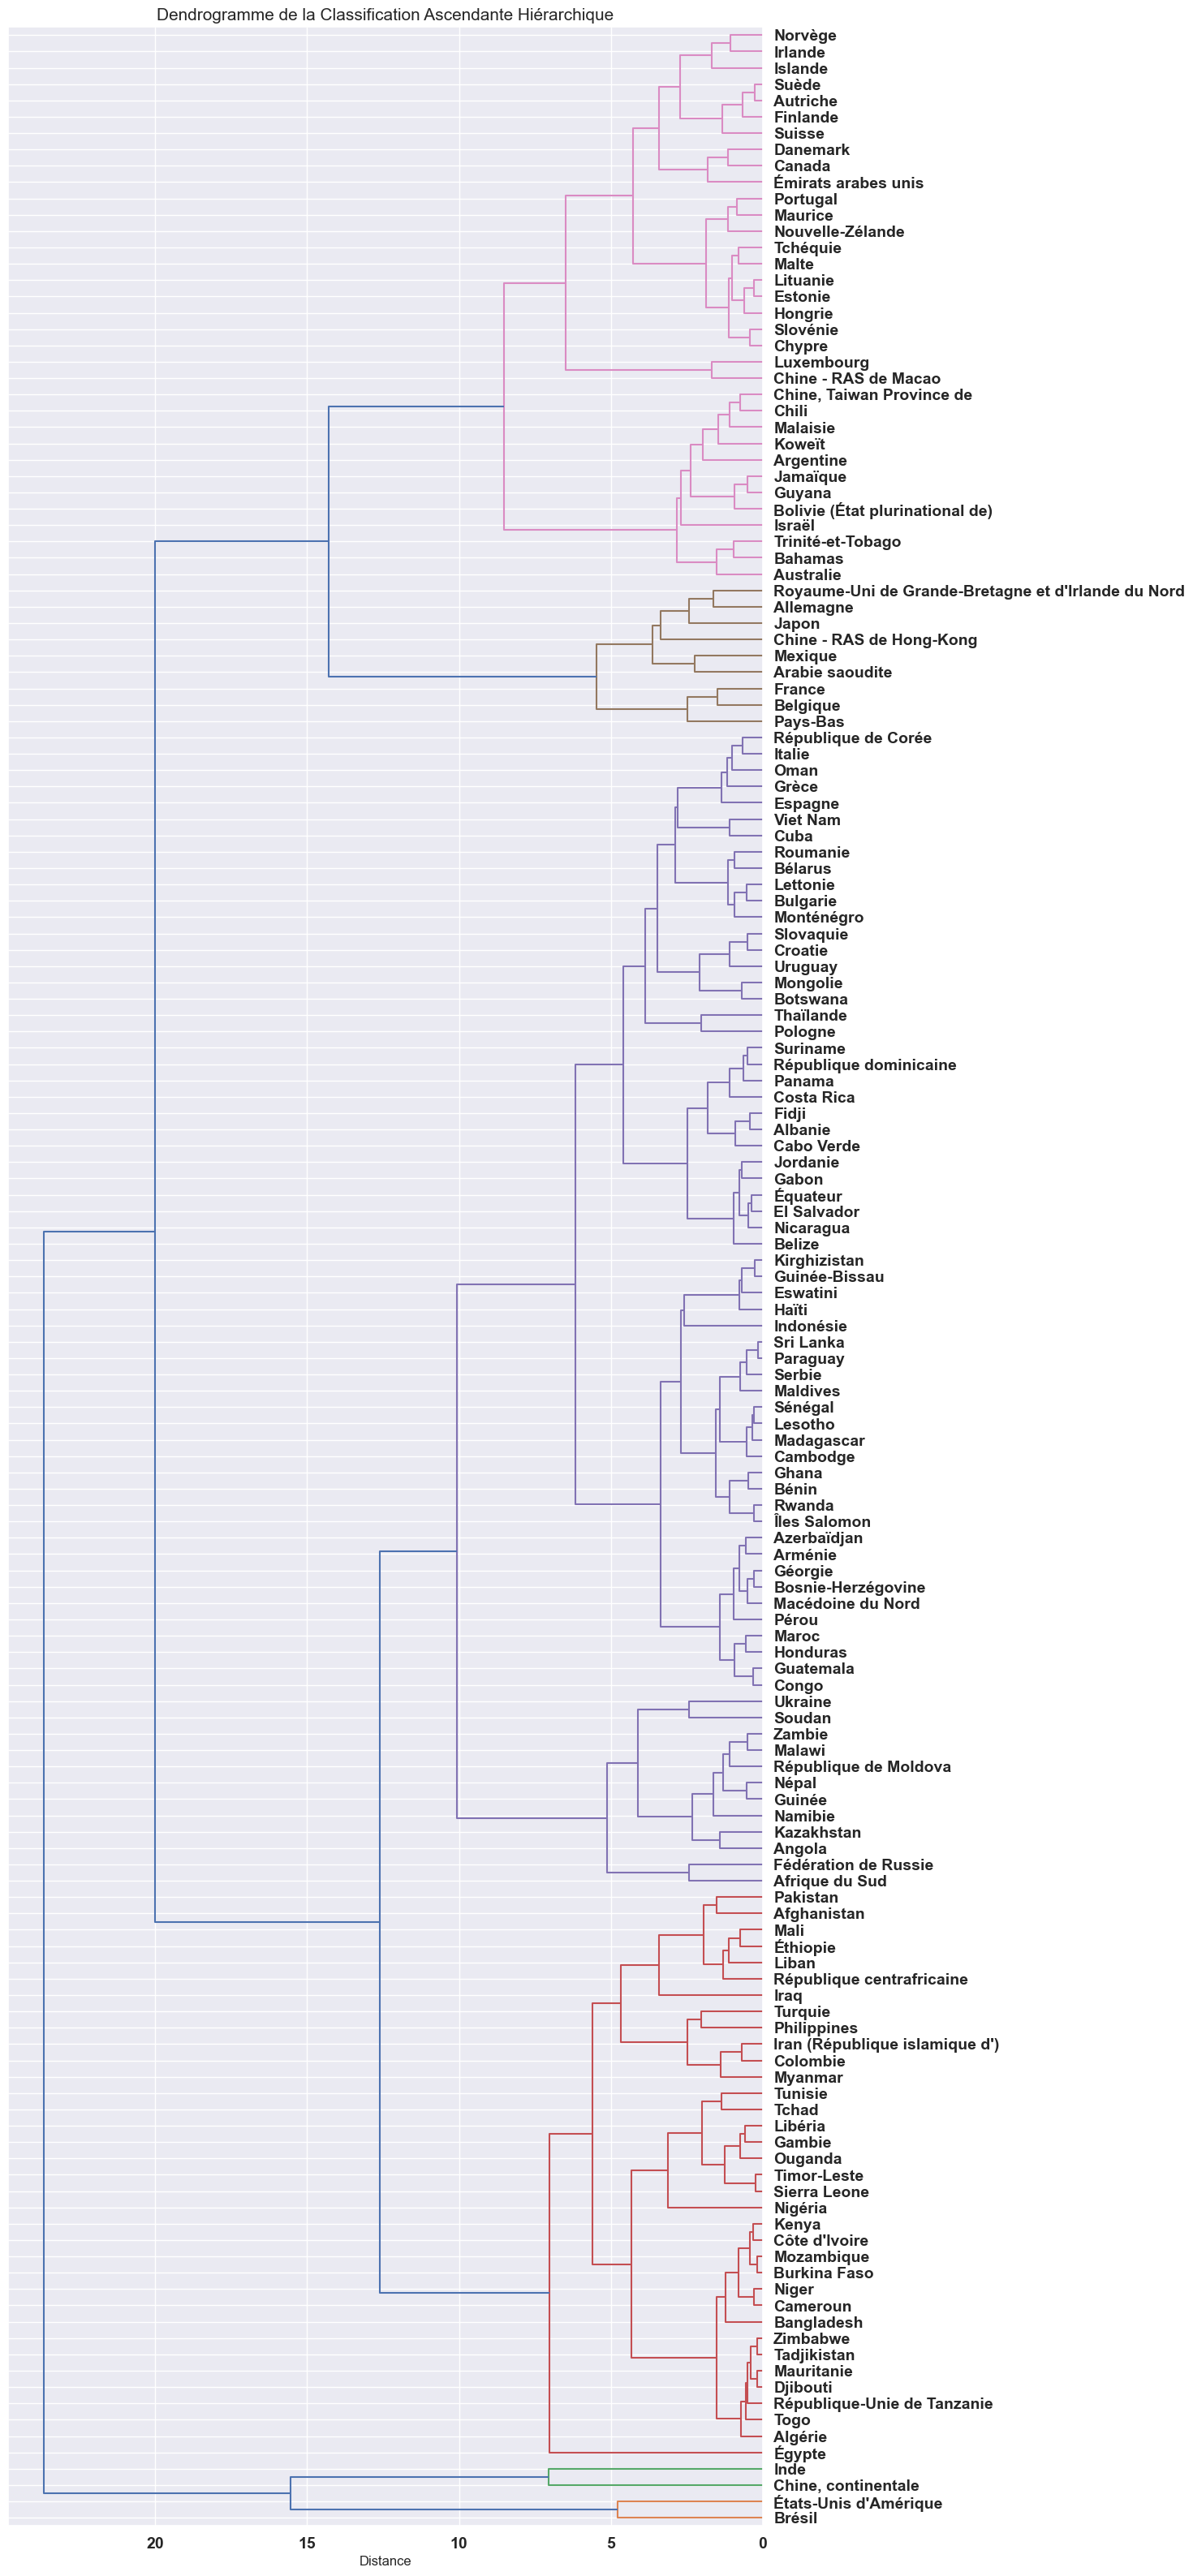

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(12,40))

_ = dendrogram(Z, ax=ax, labels=X.index,  orientation = "left",color_threshold=12)
#
plt.title("Dendrogramme de la Classification Ascendante Hiérarchique", fontsize = 15)
ax.set_xlabel("Distance")
ax.set_ylabel("")
ax.tick_params(axis='x', which='major', labelsize=14)
ax.tick_params(axis='y', which='major', labelsize=14)
plt.show()

--> **Pour une distance = 12, la CAH identifie 6 groupes de pays**

Définissons-les:

In [62]:
#Création des clusters
k = 6
clusters = fcluster(Z, k, criterion='maxclust')

#Association des pays avec les clusters
X["cluster"] = clusters

**Nombre de pays par cluster :**

In [65]:
pd.crosstab(index=X["cluster"], columns='Nombre de Pays')

col_0,Nombre de Pays
cluster,
1,2
2,2
3,35
4,71
5,9
6,34


-- **2 Pays du "*cluster 1*"**   : *USA et Brésil*  
Ces deux pays sont visiblement très éloignés des autres groupes, étant plus caractérisés par leurs fortes exportations puis leur fortes populations

In [168]:
X[X["cluster"] == 1]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB,cluster
Pays,,,,,,,,,
Brésil,204,9.982000e+09,4223000000,3000000.0,207833823.0,-0.48,17145.3,14.007823,1
États-Unis d'Amérique,219,1.826600e+10,3692000000,123000000.0,325084756.0,0.26,66105.7,3.476277,1


-- **2 Pays du "*cluster 2*"**: *Inde et Chine*  
Ces deux pays sont visiblement très éloignés des autres groupes, étant plus caractérisés par leurs fortes populations puis leurs fortes exportations

In [171]:
X[X["cluster"] == 2]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB,cluster
Pays,,,,,,,,,
"Chine, continentale",59,1.816100e+10,576000000,452000000.0,1.421022e+09,0.00,16461.1,8.937468,2
Inde,7,3.661000e+09,4000000,0.0,1.338677e+09,-0.77,7363.8,13.253577,2


-- **35 Pays du "*cluster 3*"**


In [174]:
X[X["cluster"] == 3].describe(percentiles = [])

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB,cluster
count,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,35.000000,35.000000,35.0
mean,26.285714,3.939143e+08,1.508571e+07,3.382857e+07,4.623900e+07,-1.140286,6620.165714,2.058564,3.0
std,31.035626,6.394573e+08,7.255358e+07,8.877582e+07,5.315126e+07,0.666838,6115.787512,7.196136,0.0
min,0.000000,3.000000e+06,-7.000000e+06,0.000000e+00,9.440990e+05,-2.790000,1059.000000,-29.218427,3.0
50%,12.000000,6.600000e+07,0.000000e+00,4.000000e+06,2.456607e+07,-1.080000,4744.000000,3.618119,3.0
max,116.000000,2.220000e+09,4.290000e+08,4.700000e+08,2.079062e+08,0.070000,28118.000000,11.448709,3.0


In [176]:
X.loc[X["cluster"] == 3]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB,cluster
Pays,,,,,,,,,
Afghanistan,5,5.700000e+07,0,29000000.0,36296113.0,-2.79,2956.8,1.492959,3
Algérie,22,2.770000e+08,0,2000000.0,41389189.0,-0.92,13805.4,4.228057,3
Bangladesh,7,2.500000e+08,-1000000,0.0,159685424.0,-1.25,6020.3,8.119817,3
Burkina Faso,8,4.600000e+07,0,0.0,19193234.0,-0.93,2243.2,6.818791,3
Cameroun,11,8.200000e+07,0,0.0,24566073.0,-1.09,4744.0,3.772389,3
Colombie,111,1.643000e+09,2000000,78000000.0,48909839.0,-0.78,17195.1,8.619328,3
Côte d'Ivoire,8,6.500000e+07,0,7000000.0,24437470.0,-1.09,5851.4,5.709763,3
Djibouti,9,3.000000e+06,0,3000000.0,944099.0,-0.73,5474.6,3.938660,3
Égypte,50,1.250000e+09,1000000,110000000.0,96442591.0,-1.43,14280.9,-29.218427,3


-- **71 Pays du "cluster 4"**

In [179]:
X[X["cluster"] == 4].describe(percentiles = [])

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB,cluster
count,71.000000,7.100000e+01,7.100000e+01,7.100000e+01,7.100000e+01,71.000000,71.000000,71.000000,71.0
mean,55.957746,3.613662e+08,4.533803e+07,6.161972e+07,2.086465e+07,-0.052676,16451.628169,9.373614,4.0
std,34.571845,7.031840e+08,1.579460e+08,9.153194e+07,3.796342e+07,0.553949,11865.264868,6.247022,0.0
min,5.000000,3.000000e+06,-2.000000e+06,0.000000e+00,3.757690e+05,-1.970000,1689.500000,-0.828943,4.0
50%,55.000000,9.800000e+07,1.000000e+06,2.100000e+07,9.450231e+06,-0.060000,14623.500000,7.828268,4.0
max,143.000000,4.556000e+09,1.025000e+09,5.140000e+08,2.646510e+08,1.040000,48761.900000,31.774105,4.0


In [181]:
X[X["cluster"] == 4]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB,cluster
Pays,,,,,,,,,
Afrique du Sud,143,2.118000e+09,63000000,514000000.0,57009756.0,-0.28,14823.6,17.248839,4
Albanie,85,4.700000e+07,0,38000000.0,2884169.0,0.37,14229.3,9.831055,4
Angola,35,3.190000e+08,0,277000000.0,29816766.0,-0.39,9050.0,16.553488,4
Arménie,54,4.700000e+07,0,35000000.0,2944791.0,-0.63,14880.6,9.838244,4
Azerbaïdjan,44,1.290000e+08,0,27000000.0,9845320.0,-0.75,19676.0,6.900086,4
...,...,...,...,...,...,...,...,...,...
Thaïlande,47,8.810000e+08,796000000,2000000.0,69209810.0,-0.75,20159.5,9.946734,4
Ukraine,78,1.009000e+09,273000000,121000000.0,44487709.0,-1.87,16523.5,20.542019,4
Uruguay,33,3.300000e+07,3000000,3000000.0,3436641.0,1.04,29662.1,12.813067,4


-- **9 Pays du "cluster 5"**

In [184]:
X[X["cluster"] == 5].describe(percentiles = [])

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB,cluster
count,9.000000,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000,9.000000,9.000000,9.0
mean,105.333333,1.602111e+09,4.746667e+08,7.492222e+08,5.948411e+07,0.334444,52701.933333,4.051130,5.0
std,51.725236,1.290333e+09,4.541932e+08,2.332439e+08,4.615167e+07,0.661534,13559.849858,2.949042,0.0
min,44.000000,1.520000e+08,9.000000e+06,3.380000e+08,7.306322e+06,-0.810000,22162.200000,-1.197915,5.0
50%,92.000000,1.573000e+09,5.010000e+08,7.790000e+08,6.484251e+07,0.420000,53399.000000,5.052642,5.0
max,210.000000,4.219000e+09,1.418000e+09,1.069000e+09,1.275027e+08,1.100000,65662.700000,6.063881,5.0


In [186]:
X[X["cluster"] == 5]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB,cluster
Pays,,,,,,,,,
Allemagne,71,1.739000e+09,646000000,8.420000e+08,82658409.0,0.57,61563.6,6.063881,5
Arabie saoudite,151,1.435000e+09,10000000,7.220000e+08,33101179.0,-0.65,48554.4,4.917488,5
Belgique,44,1.520000e+08,656000000,3.380000e+08,11419748.0,0.42,60044.6,5.052642,5
Chine - RAS de Hong-Kong,210,2.800000e+08,663000000,9.070000e+08,7306322.0,0.82,65662.7,5.996462,5
France,92,1.573000e+09,501000000,5.060000e+08,64842509.0,0.27,53398.3,4.758812,5
Japon,67,2.415000e+09,10000000,1.069000e+09,127502725.0,1.10,44491.1,-1.197915,5
Mexique,123,4.219000e+09,9000000,9.720000e+08,124777324.0,-0.81,22162.2,5.906355,5
Pays-Bas,70,3.720000e+08,1418000000,6.080000e+08,17021347.0,0.91,65041.5,5.913522,5
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,120,2.234000e+09,359000000,7.790000e+08,66727461.0,0.38,53399.0,-0.951075,5


-- **34 Pays du "cluster 6"**

In [189]:
X[X["cluster"] == 6].describe(percentiles = [])

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB,cluster
count,34.000000,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,34.000000,34.000000,34.000000,34.0
mean,124.088235,3.502647e+08,4.273529e+07,6.285294e+07,9.160378e+06,0.716176,50524.402941,7.779798,6.0
std,45.439515,4.940245e+08,6.051912e+07,8.506437e+07,1.090795e+07,0.552169,28921.799611,3.657888,0.0
min,55.000000,1.000000e+07,0.000000e+00,0.000000e+00,3.343930e+05,-0.890000,9566.100000,0.119860,6.0
50%,119.000000,1.595000e+08,1.150000e+07,2.350000e+07,5.403848e+06,0.875000,44536.700000,7.861259,6.0
max,234.000000,1.962000e+09,2.100000e+08,4.330000e+08,4.393714e+07,1.560000,135547.000000,16.171269,6.0


In [67]:
df_CAH = X[X["cluster"] == 6]
df_CAH

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB,cluster
Pays,,,,,,,,,
Argentine,182,1.962000e+09,207000000,8000000.0,43937140.0,0.16,28499.0,14.429876,6
Australie,192,1.171000e+09,42000000,16000000.0,24584620.0,0.88,56028.4,6.355818,6
Autriche,65,1.730000e+08,78000000,110000000.0,8819901.0,1.03,63840.4,4.752368,6
Bahamas,182,2.600000e+07,8000000,24000000.0,381755.0,0.98,32329.7,3.914287,6
Bolivie (État plurinational de),155,4.290000e+08,1000000,1000000.0,11192855.0,-0.28,9566.1,8.843712,6
Canada,154,1.433000e+09,163000000,182000000.0,36732095.0,1.09,55589.8,6.633909,6
Chili,153,6.720000e+08,115000000,155000000.0,18470439.0,0.41,28155.1,8.904615,6
Chine - RAS de Macao,142,1.900000e+07,0,23000000.0,622585.0,1.41,135547.0,9.701493,6
"Chine, Taiwan Province de",126,7.850000e+08,8000000,161000000.0,23674546.0,0.00,25061.0,8.937468,6


<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1.2 - Calcul des moyennes par cluster </h4>
</div>

**Résumons les données afin de mieux caractériser chaque cluster**

In [195]:
#df_cluster sera utilisé pour la heatmap
df_cluster_cah = X.groupby("cluster").mean().round(2)
df_cluster_cah

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB
cluster,,,,,,,,
1,211.50,1.412400e+10,3.957500e+09,6.300000e+07,2.664593e+08,-0.11,41625.50,8.74
2,33.00,1.091100e+10,2.900000e+08,2.260000e+08,1.379849e+09,-0.38,11912.45,11.10
3,26.29,3.939143e+08,1.508571e+07,3.382857e+07,4.623900e+07,-1.14,6620.17,2.06
4,55.96,3.613662e+08,4.533803e+07,6.161972e+07,2.086465e+07,-0.05,16451.63,9.37
5,105.33,1.602111e+09,4.746667e+08,7.492222e+08,5.948411e+07,0.33,52701.93,4.05
6,124.09,3.502647e+08,4.273529e+07,6.285294e+07,9.160378e+06,0.72,50524.40,7.78


-- **2 Pays du "cluster 1"**
Ces deux pays sont visiblement très éloignés des autres groupes, étant plus caractérisés par leur fortes exportations puis leurs fortes populations

-- **2 Pays du "cluster 2"**
Ces deux pays sont visiblement très éloignés des autres groupes, étant plus caractérisés par leur fortes populations puis leurs fortes exportations

-- **35 Pays du "cluster 3"**
Ces pays ont une stabilité politique et économique très faible, et un faible potentiel de croissance économique. Avec de plus une disponiblité alimentaire faible, ces pays semblent être en difficulté sur les critères étudiés et sont donc à écarter actuellement.

-- **71 Pays du "cluster 4"**
Ces pays ont une forte croissance économique et sont plus stables que le groupe précédent, ils semblent être à un stade de développement plus avancé (dispo alim, imp et exp plus élevées pour des populations moins grandes)
    **--> Ces pays peuvent être étudiés dans un second temps**

-- **9 Pays du "cluster 5"**
Ces pays font visblement partie des pays les plus riches (forte dispo alimentaire, PIB/hab et stabilité politique). Ce sont aussi les pays les plus importateurs de viande de volaille.

-- **34 Pays du "cluster 6"**
Ces pays font partie des pays riches, avec un PIB/hab légèrement inférieur aux pays les plus riches, mais une plus forte croissance économique, et une meilleure stabilité politique. De plus, avec une disponibilité alimentaire/hab plus élevée, ils semblent être de grands consommateurs de viande de volaille.
    **--> Ces pays sont à étudier en priorité**

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1.3 - Projection des individus par cluster  </h4>
</div>

In [199]:
X_proj

,F1,F2,F3,F4,F5,F6,F7,F8
0,-2.225200,1.949980,-1.007205,-0.385222,0.956000,0.117802,1.431340,0.019393
1,1.388586,0.114499,0.580539,1.536732,1.907275,0.917669,-0.592130,0.197724
2,-0.257810,-0.504274,0.558487,-0.082467,-0.045292,0.276292,-0.605969,-0.041868
3,-1.227942,0.693673,-0.333671,-0.219217,-0.065979,-0.197518,0.414130,0.067860
4,2.819152,-0.593422,-1.495526,2.057635,1.422582,-1.503731,0.002200,-0.354201
...,...,...,...,...,...,...,...,...
148,-0.346189,1.184462,1.648480,0.399284,1.718260,0.475527,1.078648,-0.038143
149,-0.229669,-0.910379,1.093292,0.311551,-0.744451,-0.753907,-0.490676,0.127449
150,0.090226,0.301530,-0.179083,0.988774,0.215915,-0.260655,-0.776718,0.076654
151,-1.057919,0.189026,2.247126,0.786460,0.220260,-0.628382,-0.560902,0.112663


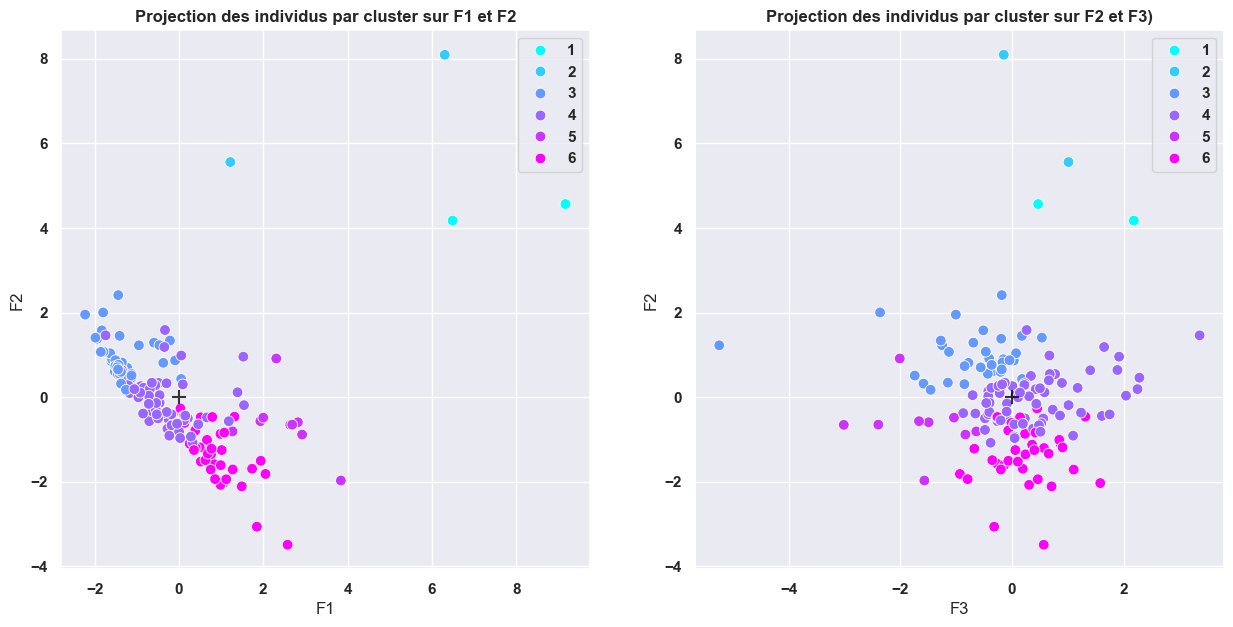

In [201]:
#Association des pays aux clusters
X_proj["cluster"] = clusters
fig, ax = plt.subplots(1,2,figsize=(15, 7))

#Projection sur F1 et F2
plt.subplot(1,2,1)
sns.scatterplot(data=X_proj,x =X_proj.iloc[:, 0], y=X_proj.iloc[:, 1], hue = "cluster", palette = "cool", s =60)
plt.scatter(0, 0, color='black', alpha=0.8,marker='+',s = 100)
plt.xlabel("F1")
plt.ylabel("F2")
plt.title("Projection des individus par cluster sur F1 et F2", fontweight = "bold")
plt.legend()

#Projection sur F2 et F3
plt.subplot(1,2,2)
sns.scatterplot(data=X_proj,x =X_proj.iloc[:, 2], y=X_proj.iloc[:, 1], hue = "cluster", palette = "cool", s =60)
plt.scatter(0, 0, color='black', alpha=0.8, marker='+', s=100)
plt.xlabel("F3")
plt.ylabel("F2")
plt.title("Projection des individus par cluster sur F2 et F3)",fontweight = "bold")
plt.legend()
plt.show()



<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1.4 - Heatmap - Points forts et points faibles de chaque cluster </h4>
</div>

In [204]:
#centrage et réduction des données pour une échelle cohérente
df_scaled = scaler.fit_transform(df_cluster_cah)
df_scaled = pd.DataFrame(df_scaled,columns = df_cluster_cah.columns, index = df_cluster_cah.index)

<Axes: title={'center': 'Heatmap des clusters'}, xlabel='cluster'>

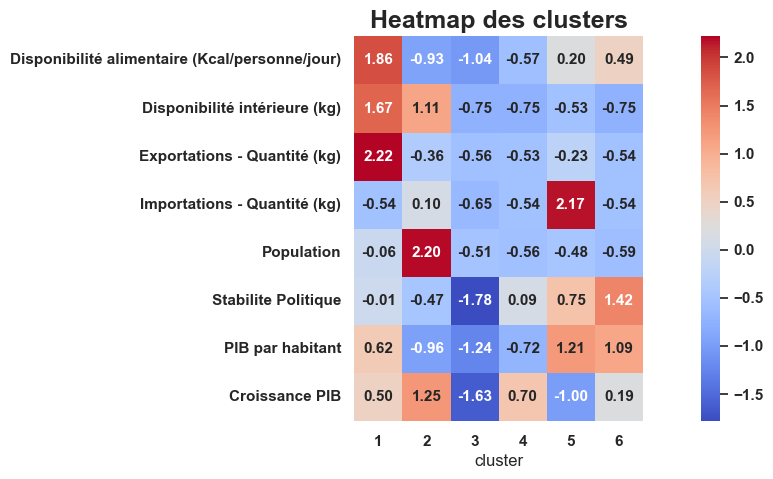

In [206]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.rcParams.update({'font.size': 11,'font.weight':'bold'})
plt.xticks (fontsize = 11,fontweight ='bold')
plt.yticks (fontsize = 11,fontweight ='bold')
plt.title("Heatmap des clusters", fontsize = 18,fontweight ='bold')
sns.heatmap(df_scaled.T, annot=True, cmap="coolwarm", fmt="0.2f",square = True)

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1.5 - Visualisations Boxplot- Répartition pour chaque variable pour chaque cluster </h4>
</div>

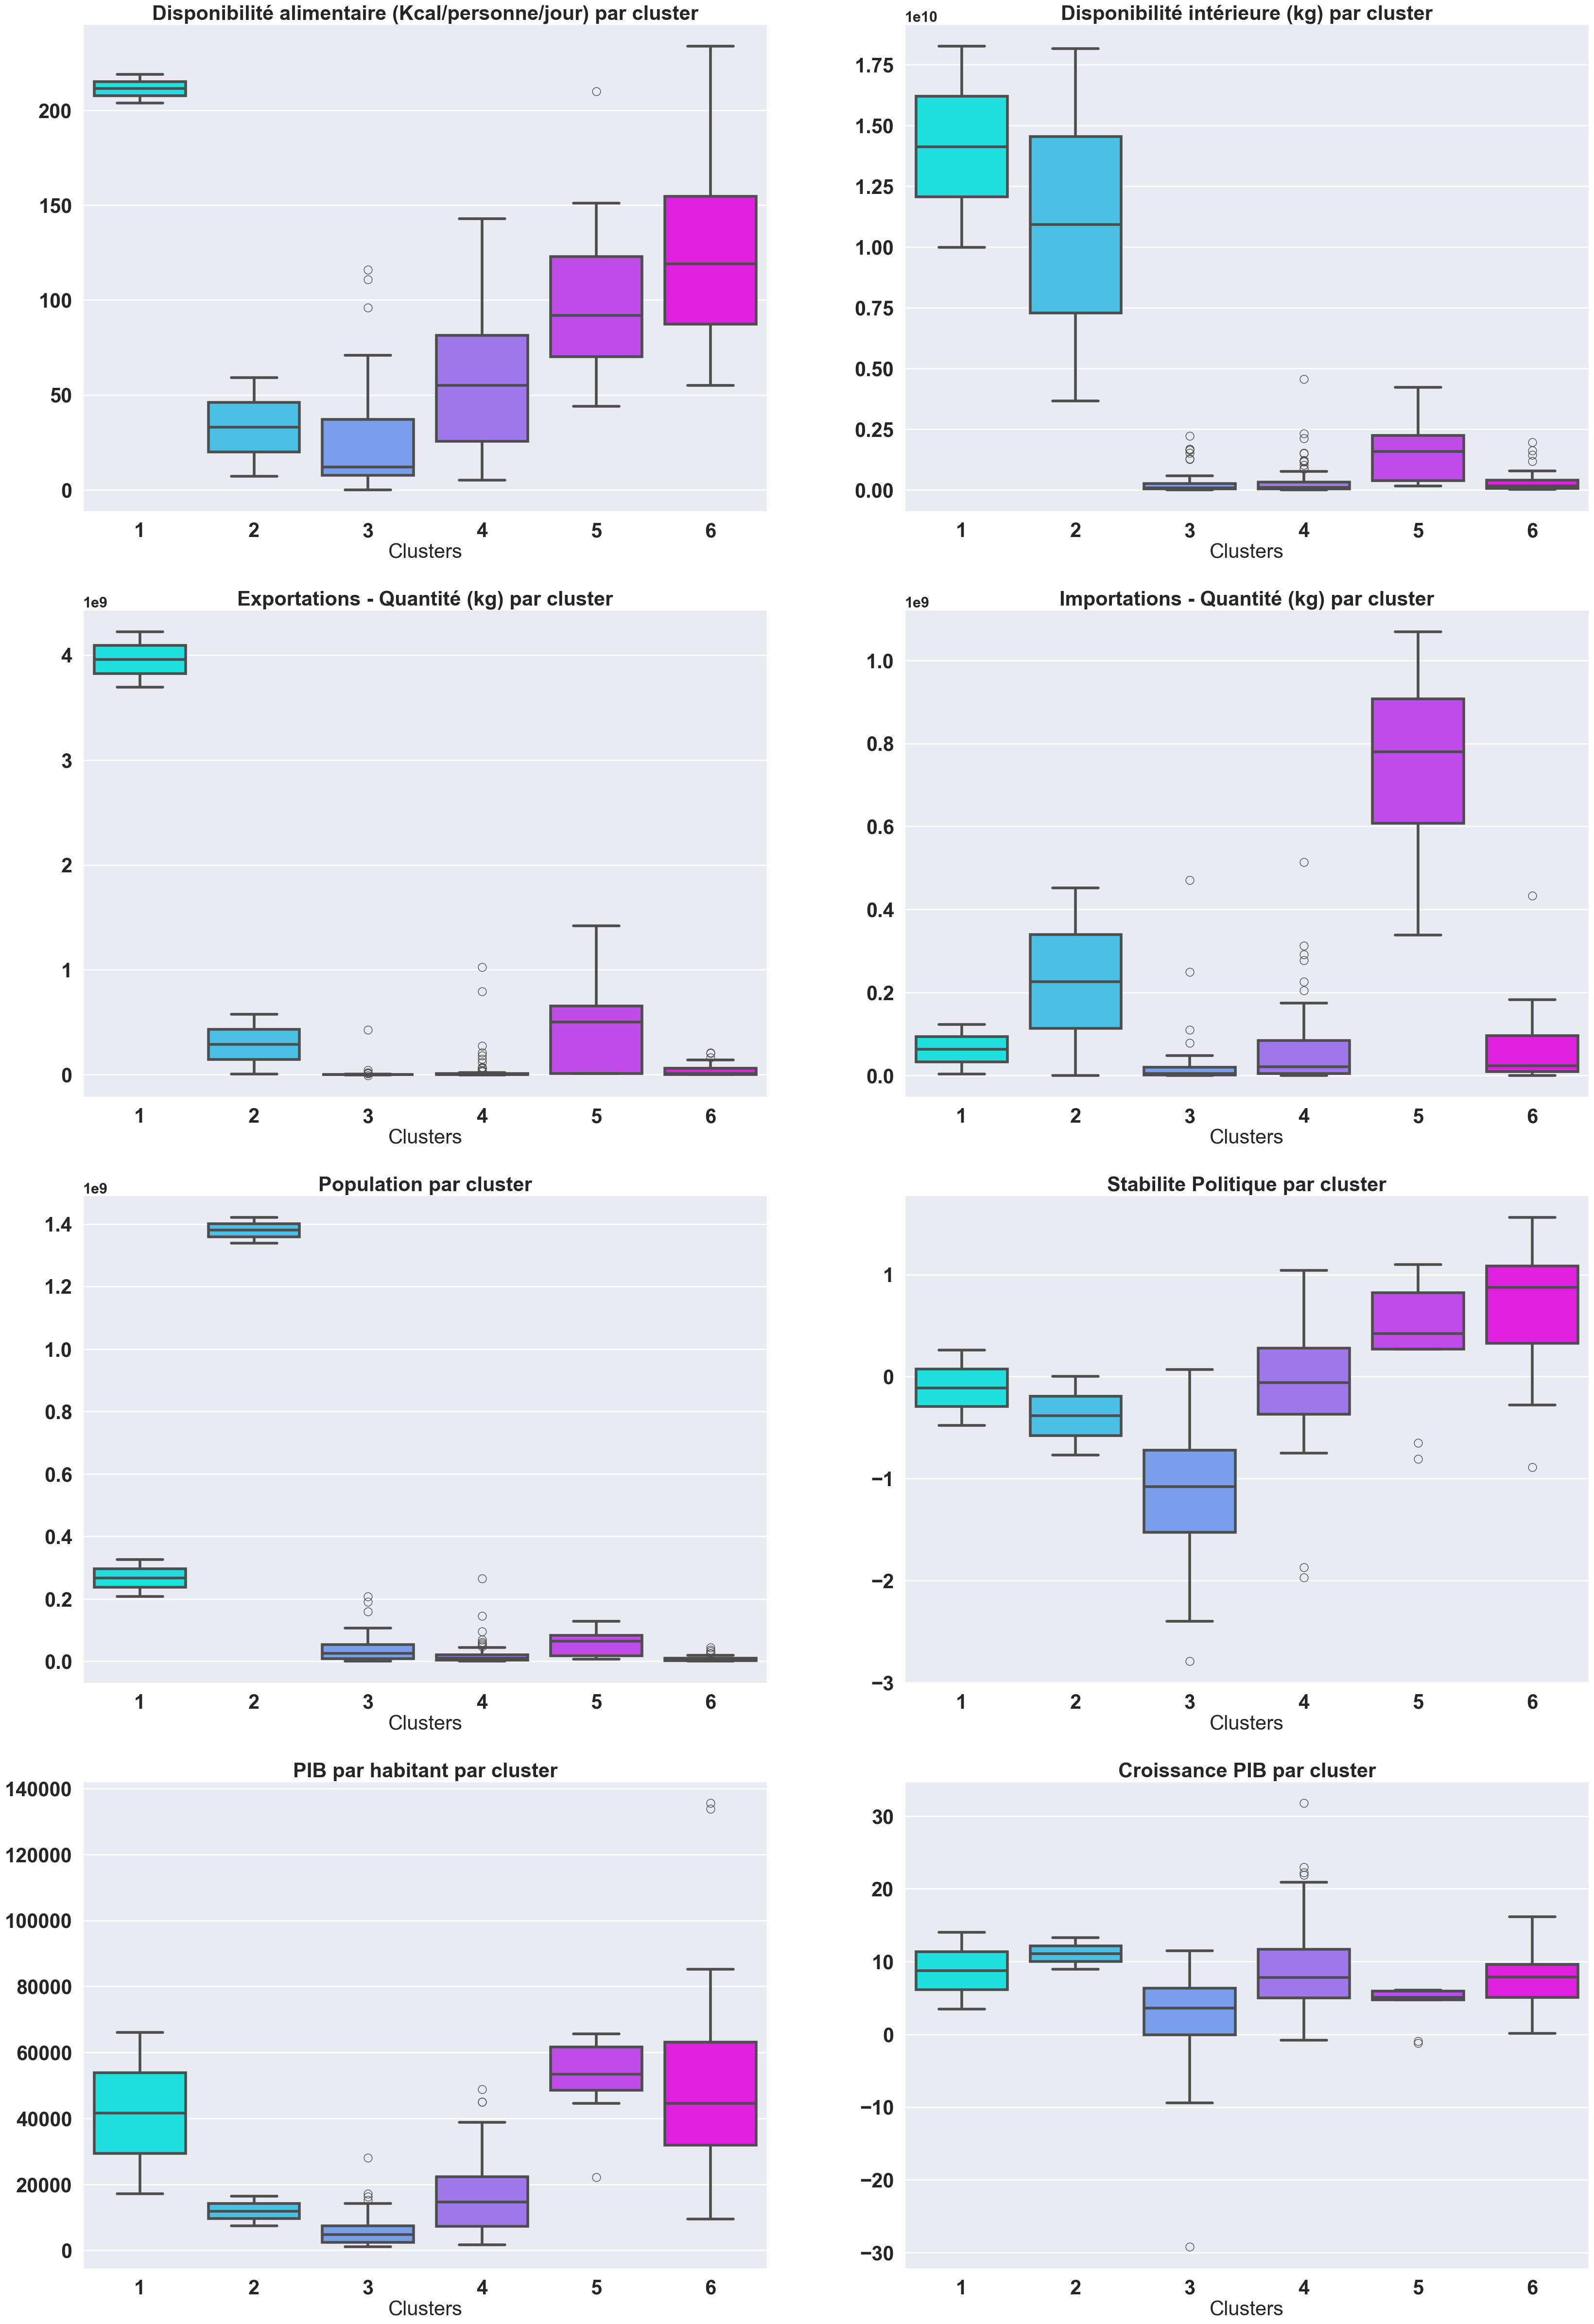

In [209]:
#Création d'une Boite à moustaches 
names = X.index
feature = X.columns
nb_feat = X.shape[1]
rows = 4

sns.set()
sns.set_context("poster")

plt.subplots(rows,2,figsize=(40, 60))

#Boxplots sur la totalité des données
for i in range(nb_feat-1) :
    plt.subplot(rows,2,i+1)
    sns.boxplot(data=X, x="cluster",y=feature[i], hue = "cluster", palette = "cool",
                legend=False,linewidth=4)
    plt.title("{} par cluster".format(feature[i]),fontsize =30,fontweight='bold')
    plt.ylabel('')
    plt.xlabel('Clusters',fontsize =30)
    plt.yticks(fontsize =30)
    plt.xticks(fontsize =30)
    x=+1

fig.tight_layout()
plt.show()

-- **2 Pays du "cluster 1"**
Ces deux pays sont visiblement très éloignés des autres groupes, étant plus caractérisés par leur fortes exportations puis leurs fortes populations

-- **2 Pays du "cluster 2"**
Ces deux pays sont visiblement très éloignés des autres groupes, étant plus caractérisés par leur fortes populations puis leurs fortes exportations

-- **35 Pays du "cluster 3"**
Ces pays ont une stabilité politique et économique très faible, et un faible potentiel de croissance économique. Avec de plus une disponiblité alimentaire faible, ces pays semblent être en difficulté sur les critères étudiés et sont donc à écarter actuellement.

-- **71 Pays du "cluster 4"**
Ces pays ont une forte croissance économique et sont plus stables que le groupe précédent, ils semblent être à un stade de développement plus avancé (dispo alim, imp et exp plus élevées pour des populations moins grandes)
    **--> Ces pays seraient à étudier dans un second temps**

-- **9 Pays du "cluster 5"**
Ces pays font visblement partie des pays les plus riches (forte dispo alimentaire, PIB/hab et stabilité politique). Ce sont aussi les pays les plus importateurs de viande de volaille.

-- **34 Pays du "cluster 6"**
Ces pays font partie des pays riches, avec un PIB/hab légèrement inférieur aux pays les plus riches, mais une plus forte croissance économique, et une meilleure stabilité politique. De plus, avec une disponibilité alimentaire/hab plus élevée, ils semblent être de grands consommateurs de viande de volaille.
    **--> Ces pays sont à étudier**

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - k-means sur données réduites</h3>
</div>

**Utilisons la méthode du coude pour déterminer un nb de clusters approprié (max=10)**

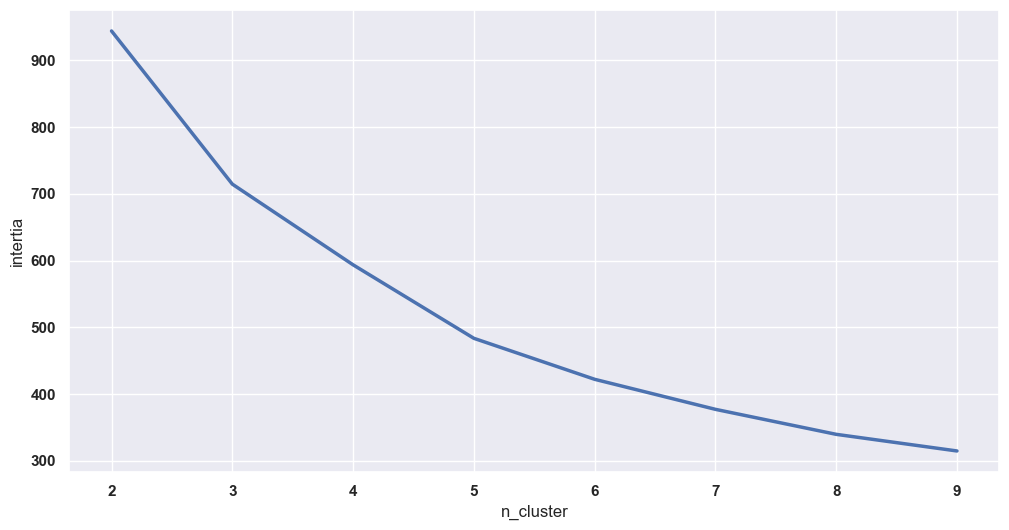

In [266]:
intertia = []
silhouettes = []
k_list = range(2, 10)
list(k_list)
for i in k_list :
  kmeans = KMeans(n_clusters=i, n_init= 30)
  kmeans.fit(X_scaled) 
  intertia.append(kmeans.inertia_)
  silh = metrics.silhouette_score(X_scaled,kmeans.labels_)
  silhouettes.append(silh)
    
#Affichage des résultats
sns.set()
sns.set_context("notebook",rc={"lines.linewidth": 2.5})
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

Text(0.5, 1.0, 'Coefficient de silhouette')

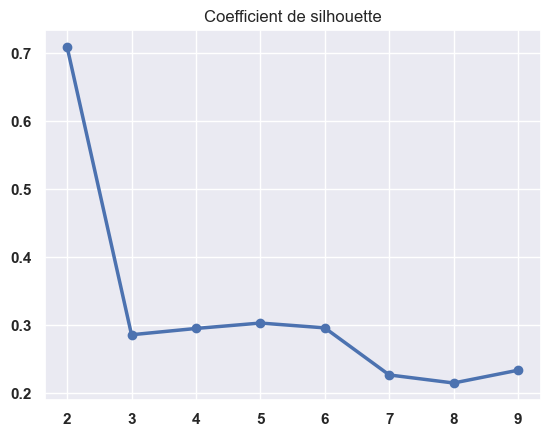

In [268]:
plt.plot(range(2,10), silhouettes, marker = "o")
plt.title("Coefficient de silhouette")

**Les premier et deuxième schémas indiquent un nombre de clusters à 6**

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2.1 - k-means sur données réduites - 6 clusters</h4>
</div>

In [272]:
kmeans = KMeans(n_clusters=6, n_init= 30)
#K-means sur données réduites
kmeans.fit(X_scaled)

KMeans(n_clusters=6, n_init=30)

In [274]:
labels = kmeans.labels_
labels

array([1, 4, 2, 1, 4, 0, 4, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 3,
       2, 1, 2, 1, 1, 2, 2, 4, 2, 5, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1,
       4, 1, 2, 2, 0, 3, 1, 0, 2, 2, 4, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1,
       2, 1, 5, 1, 1, 1, 2, 2, 2, 2, 2, 4, 1, 0, 1, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 4, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 4, 1, 1, 2, 2, 1, 2, 0, 2, 1, 0, 4, 1, 1, 1, 1,
       2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 1],
      dtype=int32)

**Nombre de pays par cluster :**

In [277]:
X["cluster"] = labels
pd.crosstab(index=X["cluster"], columns='Nombre de Pays')

col_0,Nombre de Pays
cluster,
0,16
1,70
2,53
3,2
4,10
5,2


In [279]:
#Calcul, fit et transform des centroïdes
centroids = kmeans.cluster_centers_
centroids_scaled = scaler.fit_transform(centroids)

In [281]:
#Coordonnées de projection des centroïdes pour les afficher avec les clusters
centroids_proj = pca.transform(centroids_scaled)
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2", "F3", "F4","F5","F6","F7","F8"], 
                              index=["cluster_0","cluster_1", "cluster_2","cluster_3","cluster_4","cluster_5"
                                    ])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2.3 - Projection des individus et centroïdes - 6 clusters</h4>
</div>

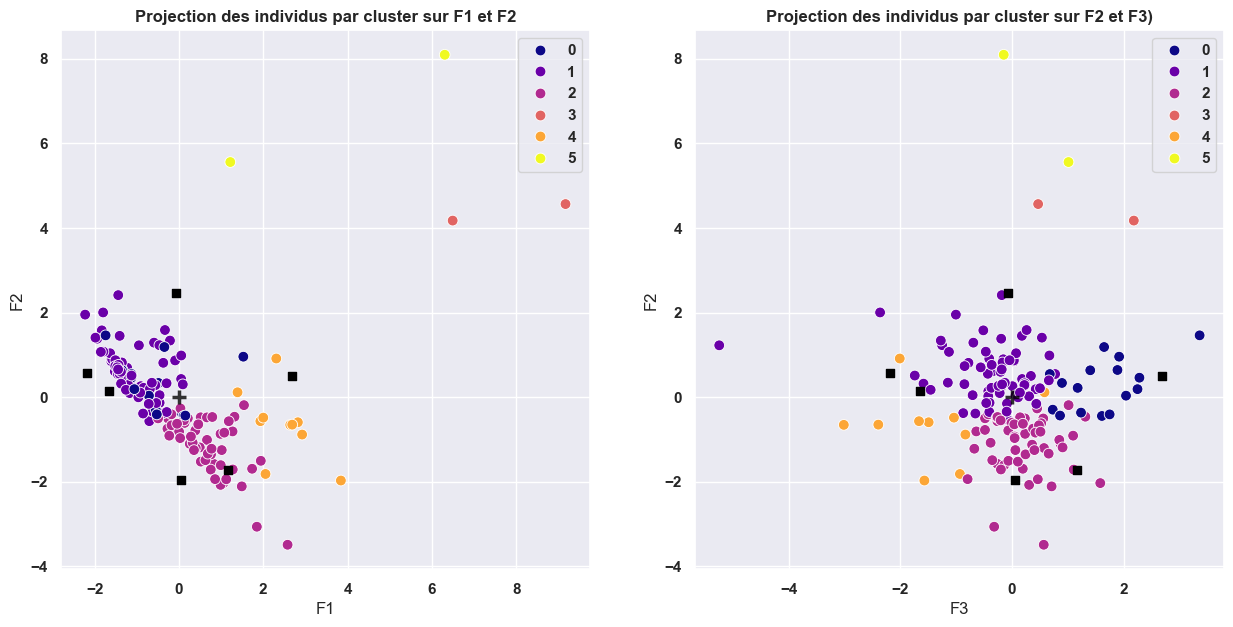

In [284]:
#Association des pays aux clusters
X_proj["cluster"] = labels

fig, ax = plt.subplots(1,2,figsize=(15, 7))

#Projection sur F1 et F2
plt.subplot(1,2,1)
sns.scatterplot(data=X_proj,x =X_proj.iloc[:, 0], y=X_proj.iloc[:, 1], hue = "cluster", palette = "plasma", s =60)
plt.scatter(0, 0, color='black', alpha=0.8,marker='+',s = 100)
plt.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )
plt.xlabel("F1")
plt.ylabel("F2")
plt.title("Projection des individus par cluster sur F1 et F2", fontweight = "bold")
plt.legend()

#Projection sur F3 et F2
plt.subplot(1,2,2)
sns.scatterplot(data=X_proj,x =X_proj.iloc[:, 2], y=X_proj.iloc[:, 1], hue = "cluster", palette = "plasma", s =60)
plt.scatter(0, 0, color='black', alpha=0.8, marker='+', s=100)
plt.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )
plt.xlabel("F3")
plt.ylabel("F2")
plt.title("Projection des individus par cluster sur F2 et F3)",fontweight = "bold")
plt.legend()
plt.show()


In [286]:
X[X["cluster"] == 0]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB,cluster
Pays,,,,,,,,,
Angola,35,3.190000e+08,0,277000000.0,29816766.0,-0.39,9050.0,16.553488,0
Bélarus,95,2.650000e+08,152000000,21000000.0,9450231.0,-0.06,25504.0,14.674484,0
Eswatini,22,7.000000e+06,0,2000000.0,1124805.0,-0.27,9222.6,14.455325,0
Fédération de Russie,104,4.556000e+09,115000000,226000000.0,145530082.0,-0.64,36011.8,23.002806,0
Guinée,14,5.000000e+07,0,37000000.0,12067519.0,-0.70,3371.9,16.963677,0
Haïti,31,9.800000e+07,0,89000000.0,10982366.0,-0.68,3459.7,12.450120,0
Kazakhstan,61,3.310000e+08,6000000,174000000.0,18080019.0,0.02,32597.8,19.941732,0
Malawi,17,9.800000e+07,65000000,0.0,17670196.0,-0.25,1689.5,22.205563,0
Monténégro,55,1.000000e+07,0,8000000.0,627563.0,-0.06,23294.5,11.179503,0


In [288]:
X[X["cluster"] == 1]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB,cluster
Pays,,,,,,,,,
Afghanistan,5,5.700000e+07,0,29000000.0,36296113.0,-2.79,2956.8,1.492959,1
Algérie,22,2.770000e+08,0,2000000.0,41389189.0,-0.92,13805.4,4.228057,1
Arménie,54,4.700000e+07,0,35000000.0,2944791.0,-0.63,14880.6,9.838244,1
Azerbaïdjan,44,1.290000e+08,0,27000000.0,9845320.0,-0.75,19676.0,6.900086,1
Bangladesh,7,2.500000e+08,-1000000,0.0,159685424.0,-1.25,6020.3,8.119817,1
...,...,...,...,...,...,...,...,...,...
Togo,24,5.400000e+07,0,16000000.0,7698474.0,-0.87,2476.9,2.644293,1
Tunisie,57,1.950000e+08,4000000,0.0,11433443.0,-1.02,12685.4,-5.963743,1
Turquie,71,1.674000e+09,429000000,3000000.0,81116450.0,-1.79,28118.0,-2.517629,1


**Rq: Custer 1 correspond à unpays près au cluster 5 de la CAH**

In [290]:
df_KM = X[X["cluster"] == 2]
df_KM

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB,cluster
Pays,,,,,,,,,
Albanie,85,4.700000e+07,0,38000000.0,2884169.0,0.37,14229.3,9.831055,2
Argentine,182,1.962000e+09,207000000,8000000.0,43937140.0,0.16,28499.0,14.429876,2
Australie,192,1.171000e+09,42000000,16000000.0,24584620.0,0.88,56028.4,6.355818,2
Autriche,65,1.730000e+08,78000000,110000000.0,8819901.0,1.03,63840.4,4.752368,2
Bahamas,182,2.600000e+07,8000000,24000000.0,381755.0,0.98,32329.7,3.914287,2
Belgique,44,1.520000e+08,656000000,338000000.0,11419748.0,0.42,60044.6,5.052642,2
Bolivie (État plurinational de),155,4.290000e+08,1000000,1000000.0,11192855.0,-0.28,9566.1,8.843712,2
Bulgarie,81,1.570000e+08,45000000,108000000.0,7102444.0,0.32,25875.6,10.683896,2
Cabo Verde,62,1.000000e+07,7000000,12000000.0,537498.0,0.76,7376.8,6.690656,2


In [292]:
X[X["cluster"] == 3]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB,cluster
Pays,,,,,,,,,
Brésil,204,9.982000e+09,4223000000,3000000.0,207833823.0,-0.48,17145.3,14.007823,3
États-Unis d'Amérique,219,1.826600e+10,3692000000,123000000.0,325084756.0,0.26,66105.7,3.476277,3


In [294]:
X[X["cluster"] == 4]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB,cluster
Pays,,,,,,,,,
Afrique du Sud,143,2.118000e+09,63000000,5.140000e+08,57009756.0,-0.28,14823.6,17.248839,4
Allemagne,71,1.739000e+09,646000000,8.420000e+08,82658409.0,0.57,61563.6,6.063881,4
Arabie saoudite,151,1.435000e+09,10000000,7.220000e+08,33101179.0,-0.65,48554.4,4.917488,4
Chine - RAS de Hong-Kong,210,2.800000e+08,663000000,9.070000e+08,7306322.0,0.82,65662.7,5.996462,4
Émirats arabes unis,147,4.120000e+08,94000000,4.330000e+08,9487203.0,0.60,70048.5,4.894532,4
France,92,1.573000e+09,501000000,5.060000e+08,64842509.0,0.27,53398.3,4.758812,4
Japon,67,2.415000e+09,10000000,1.069000e+09,127502725.0,1.10,44491.1,-1.197915,4
Mexique,123,4.219000e+09,9000000,9.720000e+08,124777324.0,-0.81,22162.2,5.906355,4
Pays-Bas,70,3.720000e+08,1418000000,6.080000e+08,17021347.0,0.91,65041.5,5.913522,4


In [296]:
X[X["cluster"] == 5]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB,cluster
Pays,,,,,,,,,
"Chine, continentale",59,1.816100e+10,576000000,452000000.0,1.421022e+09,0.00,16461.1,8.937468,5
Inde,7,3.661000e+09,4000000,0.0,1.338677e+09,-0.77,7363.8,13.253577,5


**Résumons les données afin de mieux caractériser chaque cluster**

In [298]:
df_cluster_km = X.groupby("cluster").mean().round(2)
df_cluster_km

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB
cluster,,,,,,,,
0,43.50,4.628125e+08,4.331250e+07,7.250000e+07,2.507833e+07,-0.43,14437.78,18.65
1,35.74,3.364000e+08,2.014286e+07,3.551429e+07,3.400701e+07,-0.65,8951.79,4.07
2,106.94,3.400377e+08,6.784906e+07,6.492453e+07,1.083748e+07,0.63,42172.52,7.57
3,211.50,1.412400e+10,3.957500e+09,6.300000e+07,2.664593e+08,-0.11,41625.50,8.74
4,119.40,1.679700e+09,3.773000e+08,7.352000e+08,5.904342e+07,0.29,49914.49,5.36
5,33.00,1.091100e+10,2.900000e+08,2.260000e+08,1.379849e+09,-0.38,11912.45,11.10



-- **16 Pays du "cluster 0"**
Ces pays semblent être émergents de par leur forte croissance économique, un PIB, une stabilité éco et politique et une disponibilité alimentaire encore un peu faible 
    **--> Certains pays de ce groupe pourraient être interessants dans un second temps**

-- **10 Pays du "cluster 4"**
Ces pays font partie des pays les plus riches, avec un PIB/hab nettement supérieur aux autres groupes, une très bonne stabilité politique, et la disponibilité alimentaire/hab la plus élevée. Ils semblent être de grands consommateurs de viande de volaille. Ce sont aussi les pays les plus importateurs de viande de volaille.
    *--> Correspond à presque au **cluster 5 de la CAH***

-- **53 Pays du "cluster 2"**
Ces pays font partie des pays riches, avec un PIB/hab légèrement inférieur aux pays les plus riches, mais une plus forte croissance économique, et une meilleure stabilité politique. Avec une disponibilité alimentaire/hab équivalente au cluster 4, ils semblent être de grands consommateurs de viande de volaille. 
    **--> Ces pays sont à étudier**

-- **2 Pays du "cluster 3"**
Ces deux pays sont visiblement très éloignés des autres groupes, étant plus caractérisés par leur fortes exportations puis leurs fortes populations
    *--> Correspond **cluster 1 de la CAH***

-- **2 Pays du "cluster 5"**
Ces deux pays sont visiblement très éloignés des autres groupes, étant plus caractérisés par leur fortes populations puis leurs fortes exportations
    *--> Correspond au **cluster 2 de la CAH***

-- **70 Pays du "cluster 1"**
Ces pays ont une stabilité politique et économique très faible, et un faible PIB/habitant. Avec de plus une disponiblité alimentaire faible, ces pays semblent être en difficulté sur les critères étudiés et sont donc à écarter actuellement.


<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2.4 - Heatmap - 6 clusters</h4>
</div>

**On peut utiliser les centroides scalés mais non projetés *centroids_scaled :***

In [301]:
centroids_scaled = pd.DataFrame(centroids_scaled,columns = df_cluster_km.columns, index =df_cluster_km.index )

<Axes: title={'center': 'Heatmap des clusters'}, xlabel='cluster'>

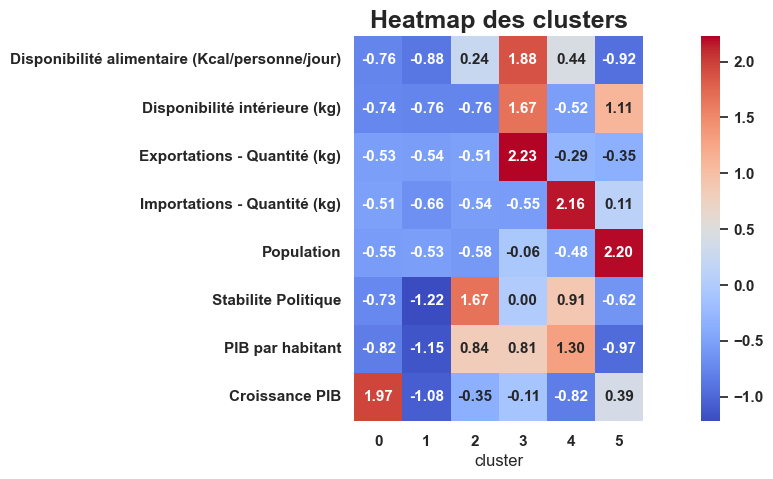

In [303]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.rcParams.update({'font.size': 11,'font.weight':'bold'})
plt.xticks (fontsize = 11,fontweight ='bold')
plt.yticks (fontsize = 11,fontweight ='bold')
plt.title("Heatmap des clusters", fontsize = 18,fontweight ='bold')
sns.heatmap(centroids_scaled.T, annot=True, cmap="coolwarm", fmt="0.2f",square = True)

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2.5 - Visualisations Boxplot- Répartition pour chaque variable pour chaque cluster</h4>
</div>

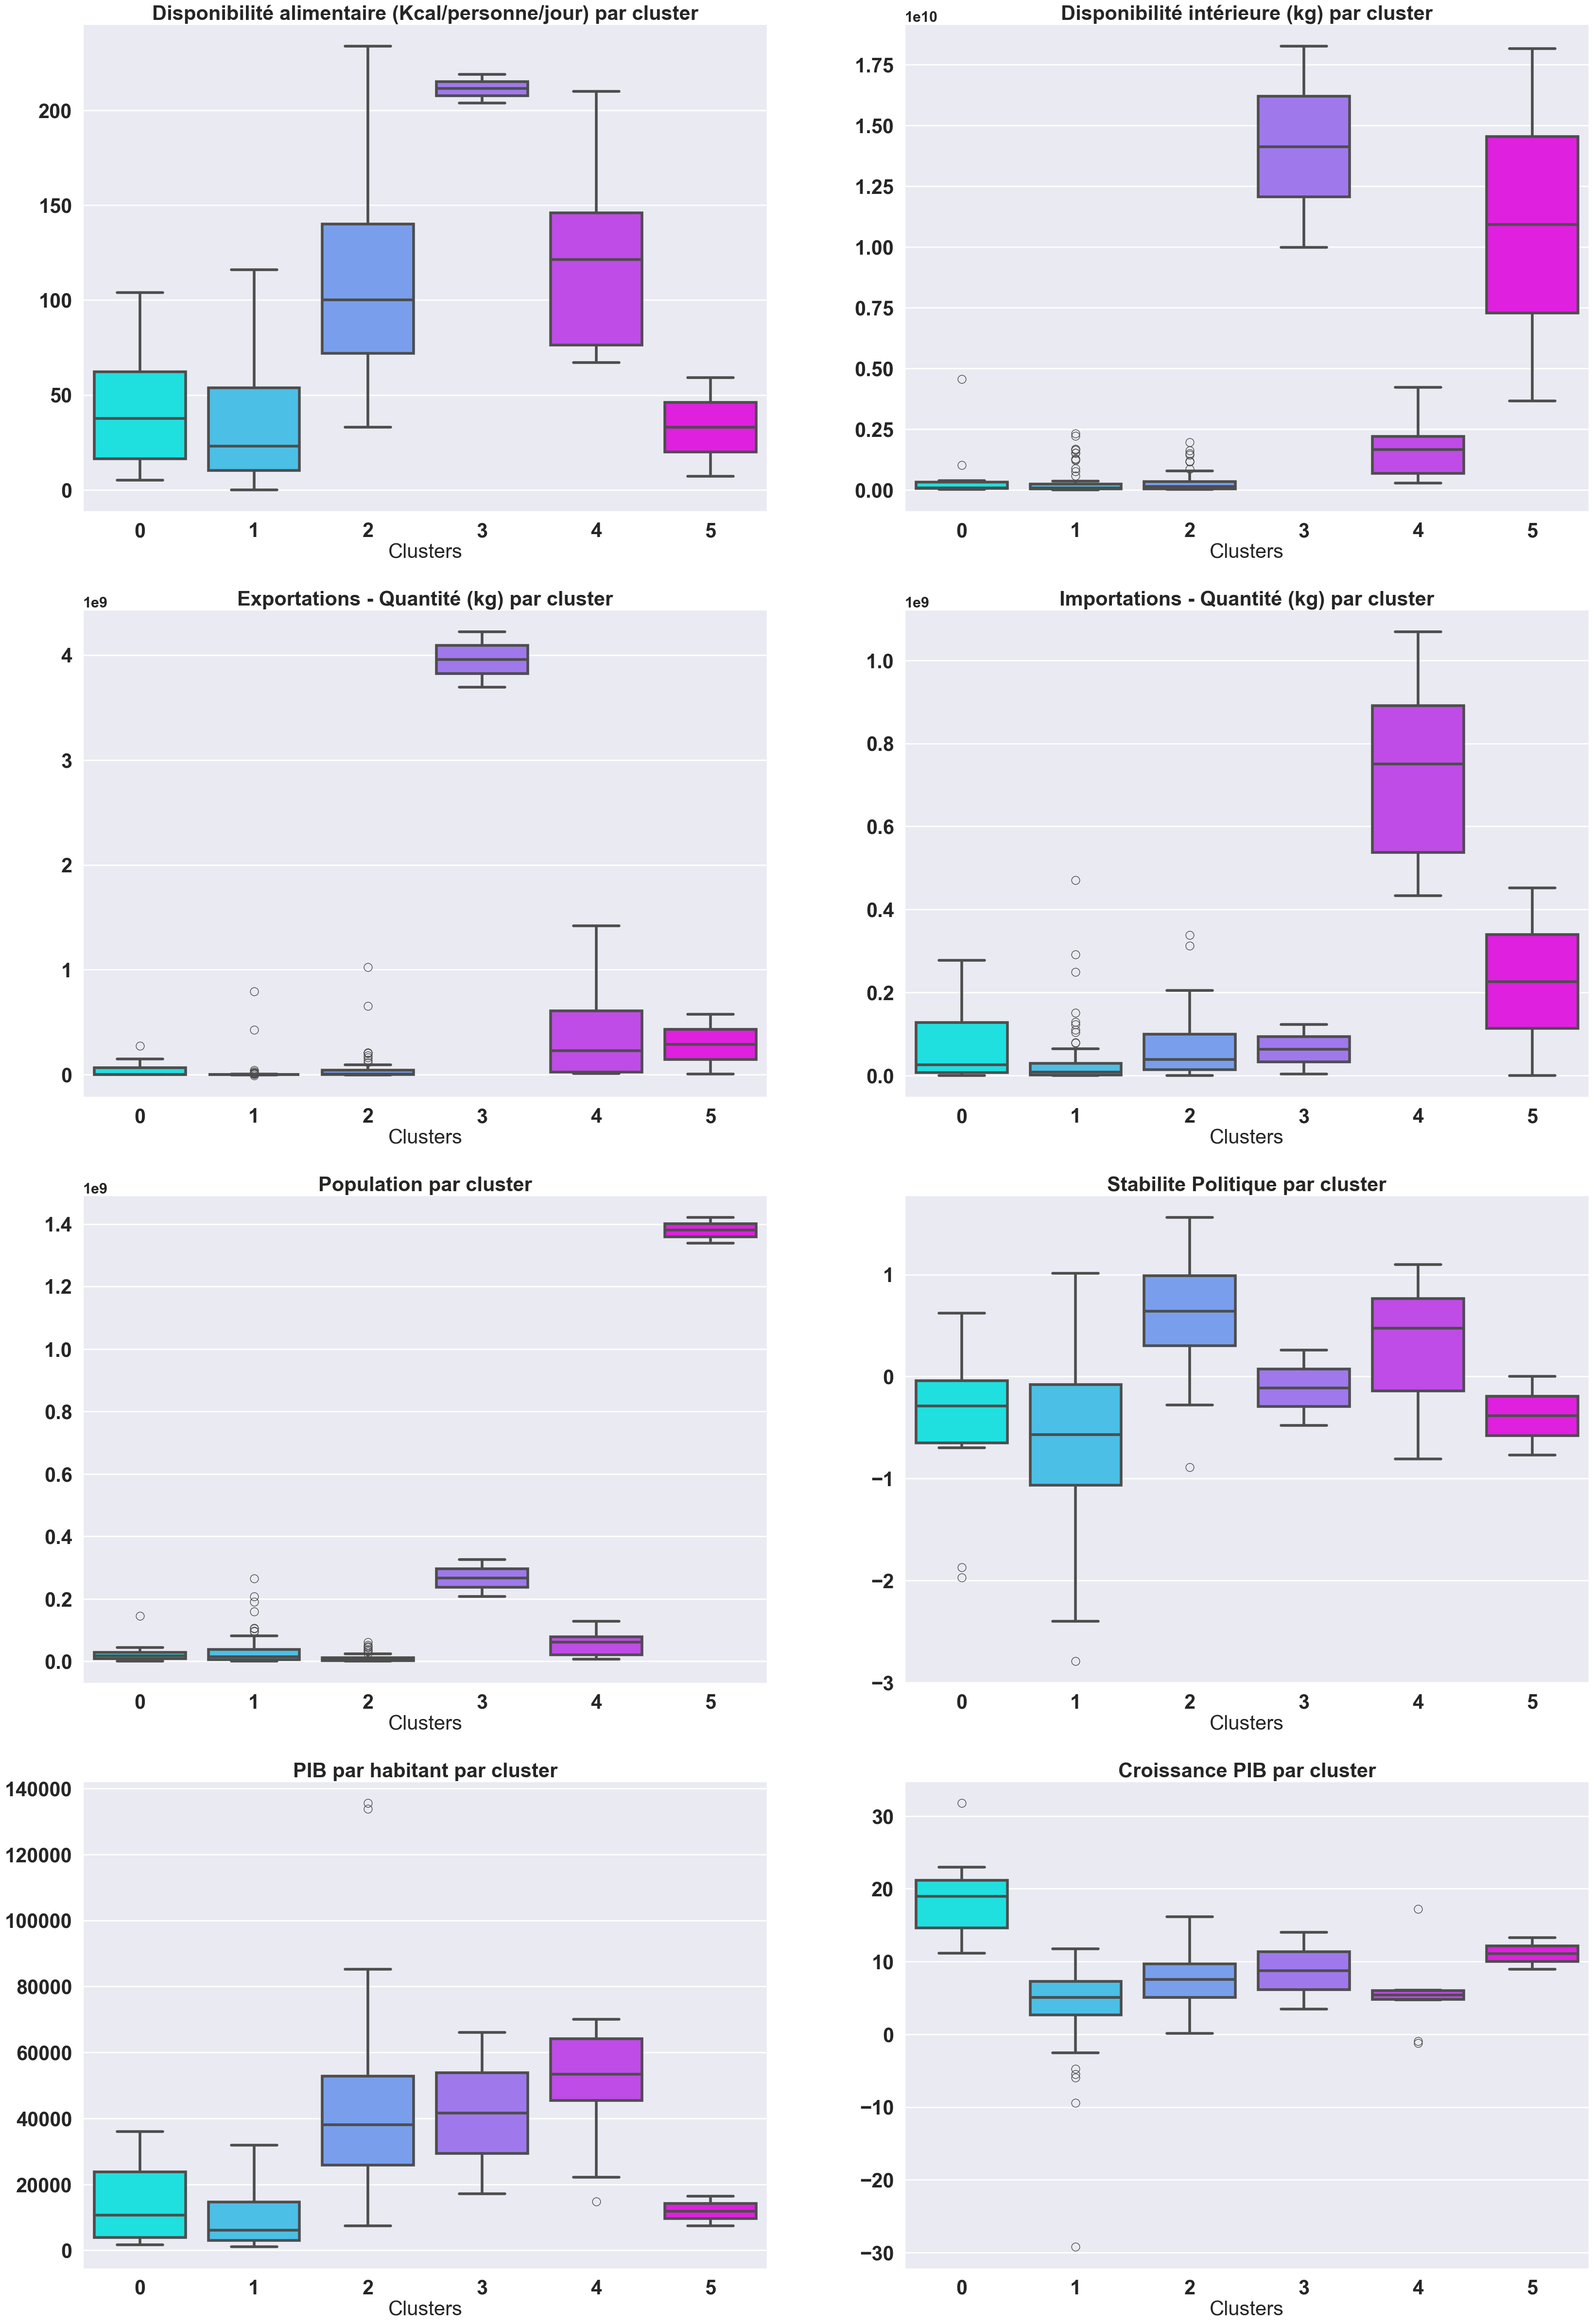

In [305]:
#Création d'une Boite à moustaches 
names = X.index
feature = X.columns
nb_feat = X.shape[1]
rows = 4

sns.set()
sns.set_context("poster")

plt.subplots(rows,2,figsize=(40, 60))

#Boxplots sur la totalité des données
for i in range(nb_feat-1) :
    plt.subplot(rows,2,i+1)
    sns.boxplot(data=X, x="cluster",y=feature[i], hue = "cluster", palette = "cool",
                legend=False,linewidth=4)
    plt.title("{} par cluster".format(feature[i]),fontsize =30,fontweight='bold')
    plt.ylabel('')
    plt.xlabel('Clusters',fontsize =30)
    plt.yticks(fontsize =30)
    plt.xticks(fontsize =30)
    x=+1

fig.tight_layout()
plt.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Conclusions </h2>
</div>

**Reprenons la liste des pays du cluster 6 de la CAH et du cluster 2 avec kMeans**

In [69]:
df_CAH

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB,cluster
Pays,,,,,,,,,
Argentine,182,1.962000e+09,207000000,8000000.0,43937140.0,0.16,28499.0,14.429876,6
Australie,192,1.171000e+09,42000000,16000000.0,24584620.0,0.88,56028.4,6.355818,6
Autriche,65,1.730000e+08,78000000,110000000.0,8819901.0,1.03,63840.4,4.752368,6
Bahamas,182,2.600000e+07,8000000,24000000.0,381755.0,0.98,32329.7,3.914287,6
Bolivie (État plurinational de),155,4.290000e+08,1000000,1000000.0,11192855.0,-0.28,9566.1,8.843712,6
Canada,154,1.433000e+09,163000000,182000000.0,36732095.0,1.09,55589.8,6.633909,6
Chili,153,6.720000e+08,115000000,155000000.0,18470439.0,0.41,28155.1,8.904615,6
Chine - RAS de Macao,142,1.900000e+07,0,23000000.0,622585.0,1.41,135547.0,9.701493,6
"Chine, Taiwan Province de",126,7.850000e+08,8000000,161000000.0,23674546.0,0.00,25061.0,8.937468,6


In [319]:
df_KM

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB,cluster
Pays,,,,,,,,,
Albanie,85,4.700000e+07,0,38000000.0,2884169.0,0.37,14229.3,9.831055,2
Argentine,182,1.962000e+09,207000000,8000000.0,43937140.0,0.16,28499.0,14.429876,2
Australie,192,1.171000e+09,42000000,16000000.0,24584620.0,0.88,56028.4,6.355818,2
Autriche,65,1.730000e+08,78000000,110000000.0,8819901.0,1.03,63840.4,4.752368,2
Bahamas,182,2.600000e+07,8000000,24000000.0,381755.0,0.98,32329.7,3.914287,2
Belgique,44,1.520000e+08,656000000,338000000.0,11419748.0,0.42,60044.6,5.052642,2
Bolivie (État plurinational de),155,4.290000e+08,1000000,1000000.0,11192855.0,-0.28,9566.1,8.843712,2
Bulgarie,81,1.570000e+08,45000000,108000000.0,7102444.0,0.32,25875.6,10.683896,2
Cabo Verde,62,1.000000e+07,7000000,12000000.0,537498.0,0.76,7376.8,6.690656,2


In [323]:
df_CAH.describe(percentiles =[])

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB,cluster
count,34.000000,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,34.000000,34.000000,34.000000,34.0
mean,124.088235,3.502647e+08,4.273529e+07,6.285294e+07,9.160378e+06,0.716176,50524.402941,7.779798,6.0
std,45.439515,4.940245e+08,6.051912e+07,8.506437e+07,1.090795e+07,0.552169,28921.799611,3.657888,0.0
min,55.000000,1.000000e+07,0.000000e+00,0.000000e+00,3.343930e+05,-0.890000,9566.100000,0.119860,6.0
50%,119.000000,1.595000e+08,1.150000e+07,2.350000e+07,5.403848e+06,0.875000,44536.700000,7.861259,6.0
max,234.000000,1.962000e+09,2.100000e+08,4.330000e+08,4.393714e+07,1.560000,135547.000000,16.171269,6.0


In [325]:
df_KM.describe(percentiles =[])

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (kg),Exportations - Quantité (kg),Importations - Quantité (kg),Population,Stabilite Politique,PIB par habitant,Croissance PIB,cluster
count,53.000000,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,53.000000,53.000000,53.000000,53.0
mean,106.943396,3.400377e+08,6.784906e+07,6.492453e+07,1.083748e+07,0.627547,42172.524528,7.572742,2.0
std,44.945443,4.804465e+08,1.694956e+08,7.482257e+07,1.450000e+07,0.485422,26369.595192,3.373334,0.0
min,33.000000,1.000000e+07,-2.000000e+06,0.000000e+00,3.343930e+05,-0.890000,7376.800000,0.119860,2.0
50%,100.000000,1.340000e+08,8.000000e+06,3.800000e+07,4.949954e+06,0.640000,38100.700000,7.568871,2.0
max,234.000000,1.962000e+09,1.025000e+09,3.380000e+08,6.067370e+07,1.560000,135547.000000,16.171269,2.0


- La méthode CAH comptabilise 34 pays dans le cluster le plus intéressant

- La méthode K-Means comptabilise les 34 pays de la CAH dans le cluster le plus intéressant plus d'autres pays ayant viviblement un index de stabilité politique, un PIB et une disponiblité alimentaire plus faibles, et de plus fortes populations. Il semble que ce sont des pays un peu moins développés que les 34 premiers, ils pourraient faire l'objet d'une étude ultérieur du fait de leur croissance économique.

- 1ères recommandations :
    - Retirer de la liste les îles suivantes du fait de la distance, de la faible population et de la probable chereté des importations : Bahamas, Chypre, Malte, Maurice, Trinité-et-Tobago.
    - Garder les pays à index de stabilité politique supérieur à 0,2
    - Je propose dans un premier de ne retenir que les pays au sein de l'union européenne pour des raisons de facilité d'échanges commerciaux (douanes, distance, droit européen commun)
 
**--> Danemark, Estonie, Finlande, Hongrie, Irlande, Lituanie, Luxembourg, Portugal, Slovénie, Suède, Tchéquie**

**--> Pays de cette liste faisant partie de la zone euro : Estonie, Finlande, Irlande, Lituanie, Luxembourg, Portugal, Slovénie**